<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Objectives of Notebook</span>

1. Dataset exploration using various types of data visualization.

2. Build various Machine Learning models that can predict the Fault type in transmission Line.


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Importing Libraries:</span>

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [279]:
sns.set_theme(context='notebook',
              style='white',
              palette='deep',
              font_scale=1.5,
              color_codes=True,
              rc=None)

import matplotlib

plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.facecolor'] = '#F0F8FF'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.edgecolor'] = 'green'
plt.rcParams['figure.frameon'] = True

plt.rcParams["figure.autolayout"] = True

plt.rcParams['axes.facecolor'] = '#F5F5DC'
plt.rcParams['axes.titlesize'] = 25
plt.rcParams["axes.titleweight"] = 'normal'
plt.rcParams["axes.titlecolor"] = 'Olive'
plt.rcParams['axes.edgecolor'] = 'pink'

plt.rcParams["axes.linewidth"] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.titlelocation'] = 'center'
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelpad"] = 2
plt.rcParams['axes.labelweight'] = 1
plt.rcParams["axes.labelcolor"] = 'Olive'
plt.rcParams["axes.axisbelow"] = False
plt.rcParams['axes.xmargin'] = .2
plt.rcParams["axes.ymargin"] = .2

plt.rcParams["xtick.bottom"] = True
plt.rcParams['xtick.color'] = '#A52A2A'
plt.rcParams["ytick.left"] = True
plt.rcParams['ytick.color'] = '#A52A2A'

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'green'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = .5
plt.rcParams['grid.alpha'] = .3

plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.facecolor'] =  'NavajoWhite'
plt.rcParams['legend.edgecolor'] = 'pink'
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.fontsize'] = 20


plt.rcParams['font.size'] = 14

plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.edgecolor'] = 'Blue'

In [280]:
df_class = pd.read_csv("/content/classData.csv")
df_class.sample(5).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

In [281]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [282]:
df_class.isnull().sum().sum()

0

In [283]:
df_class.shape

(7861, 10)

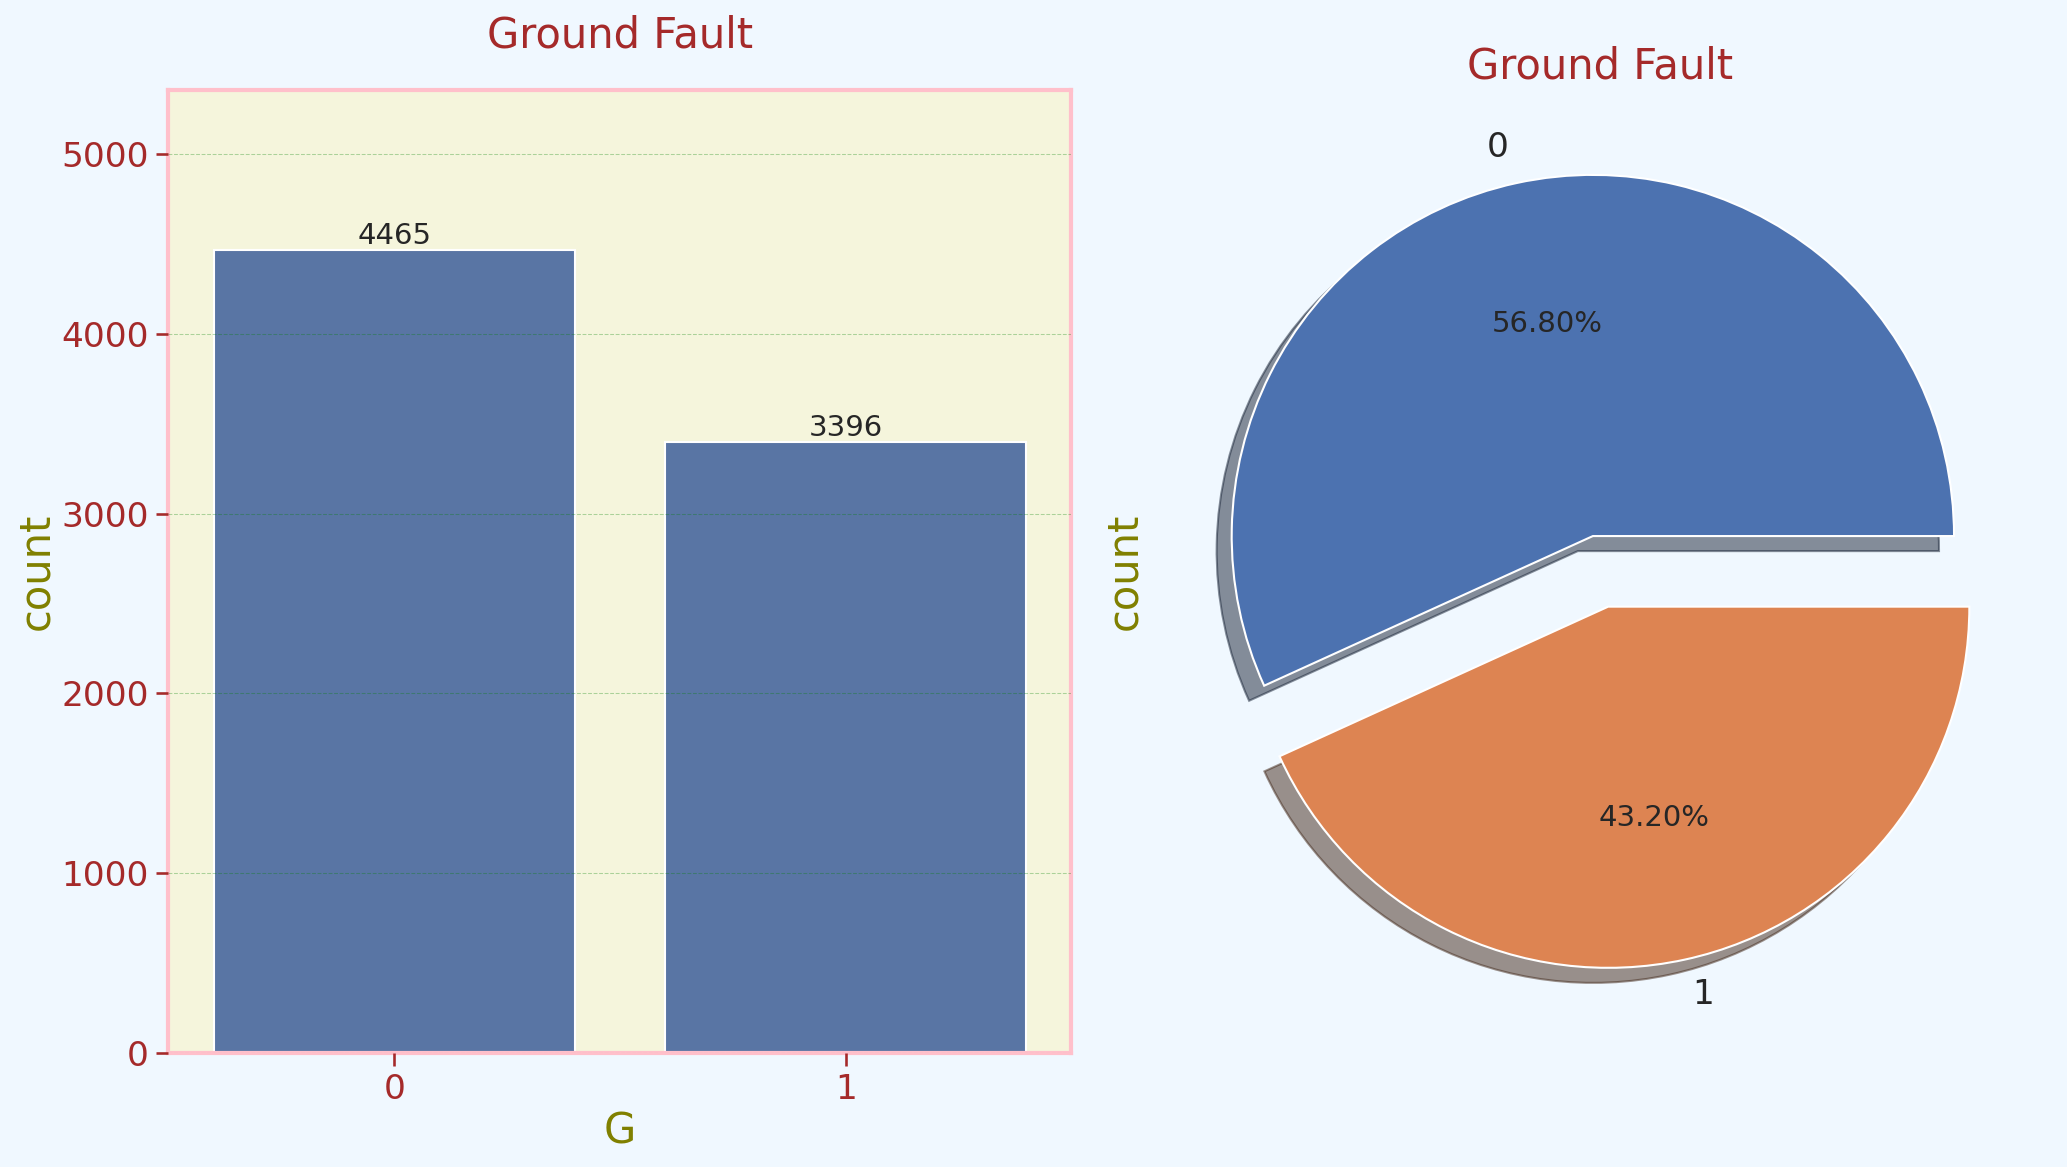

In [284]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='G', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Ground Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=df_class['G'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Ground Fault", fontsize = 20,color='Brown',pad=20);

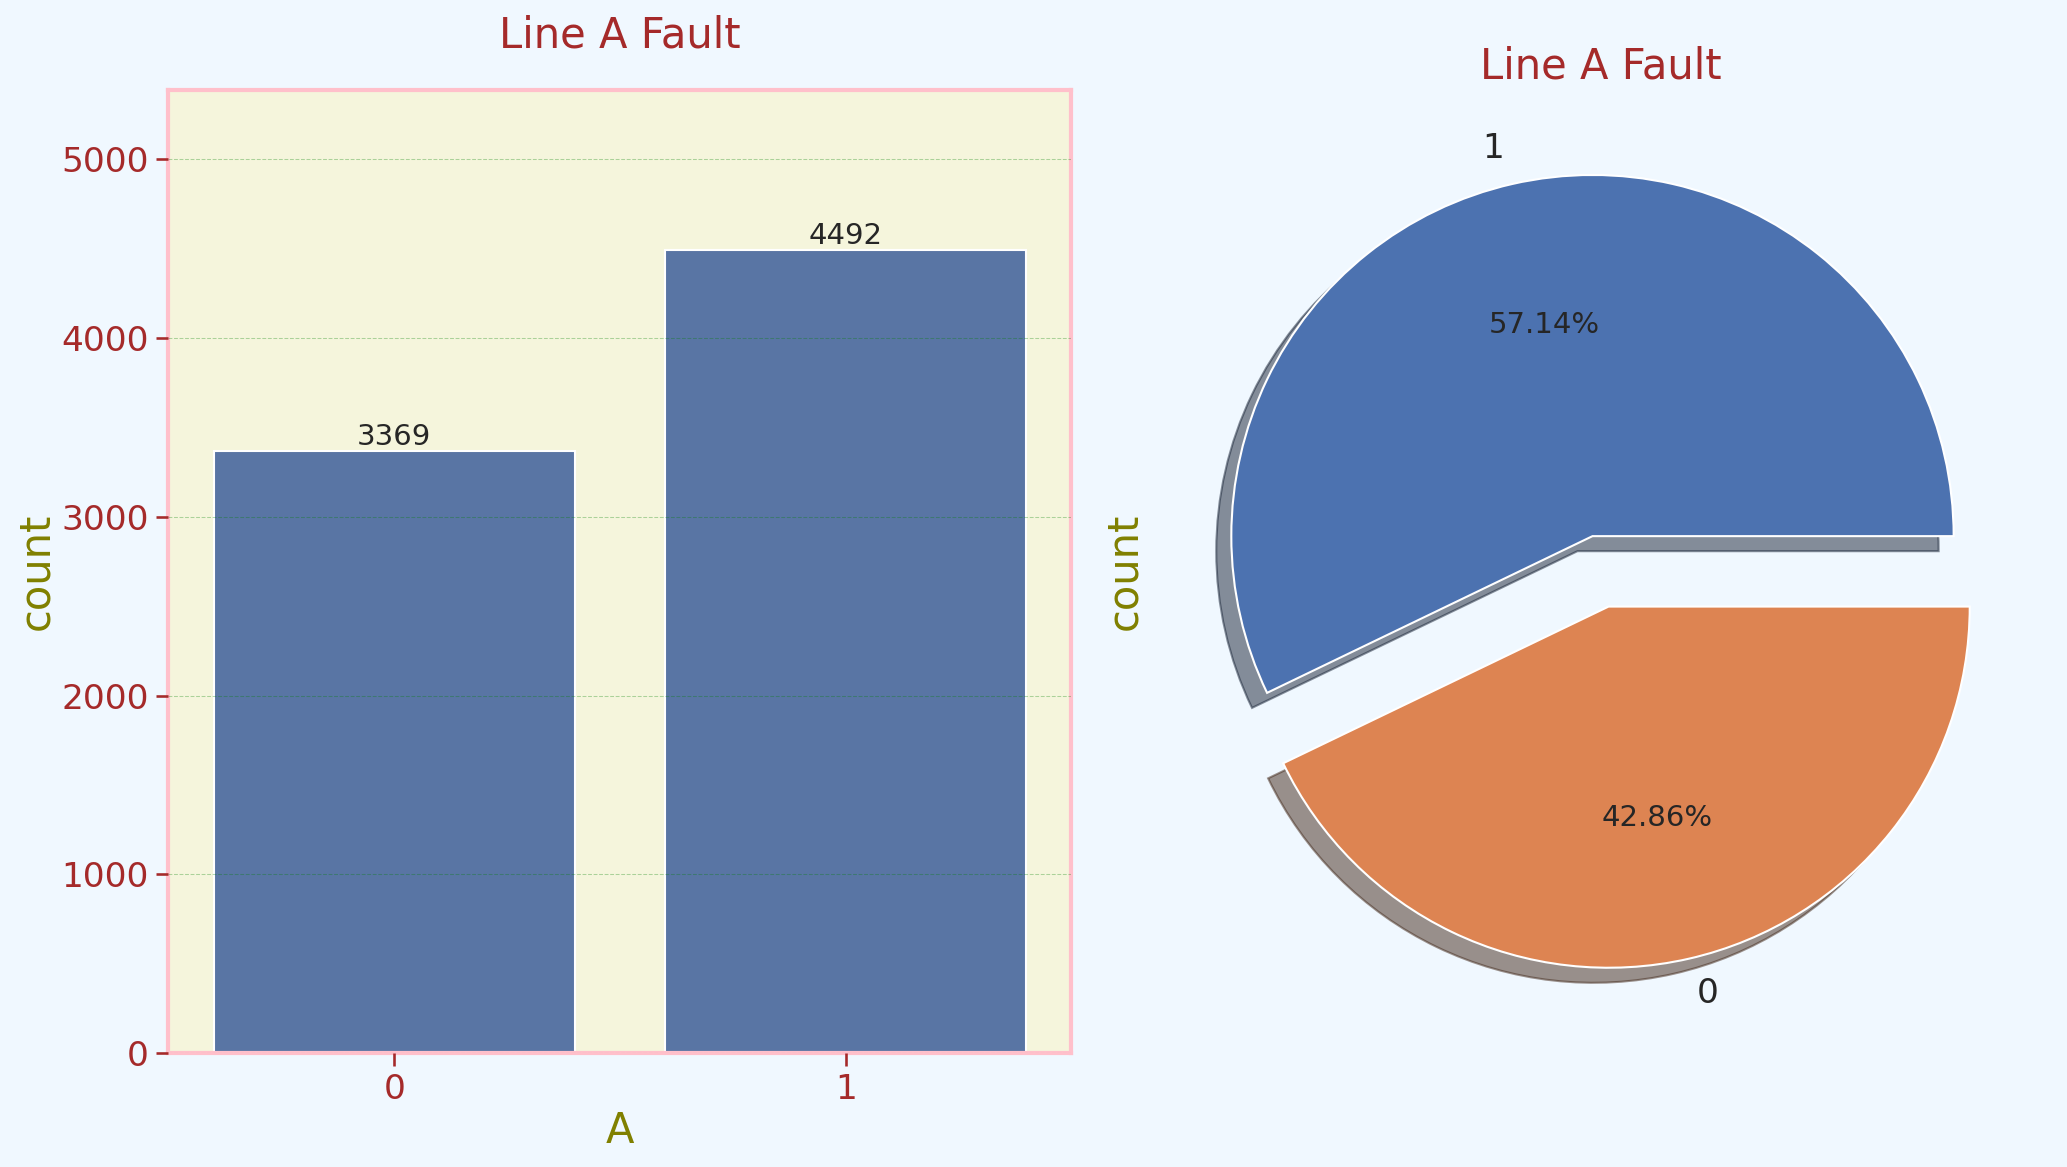

In [285]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='A', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Line A Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=df_class['A'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line A Fault", fontsize = 20,color='Brown',pad=20);

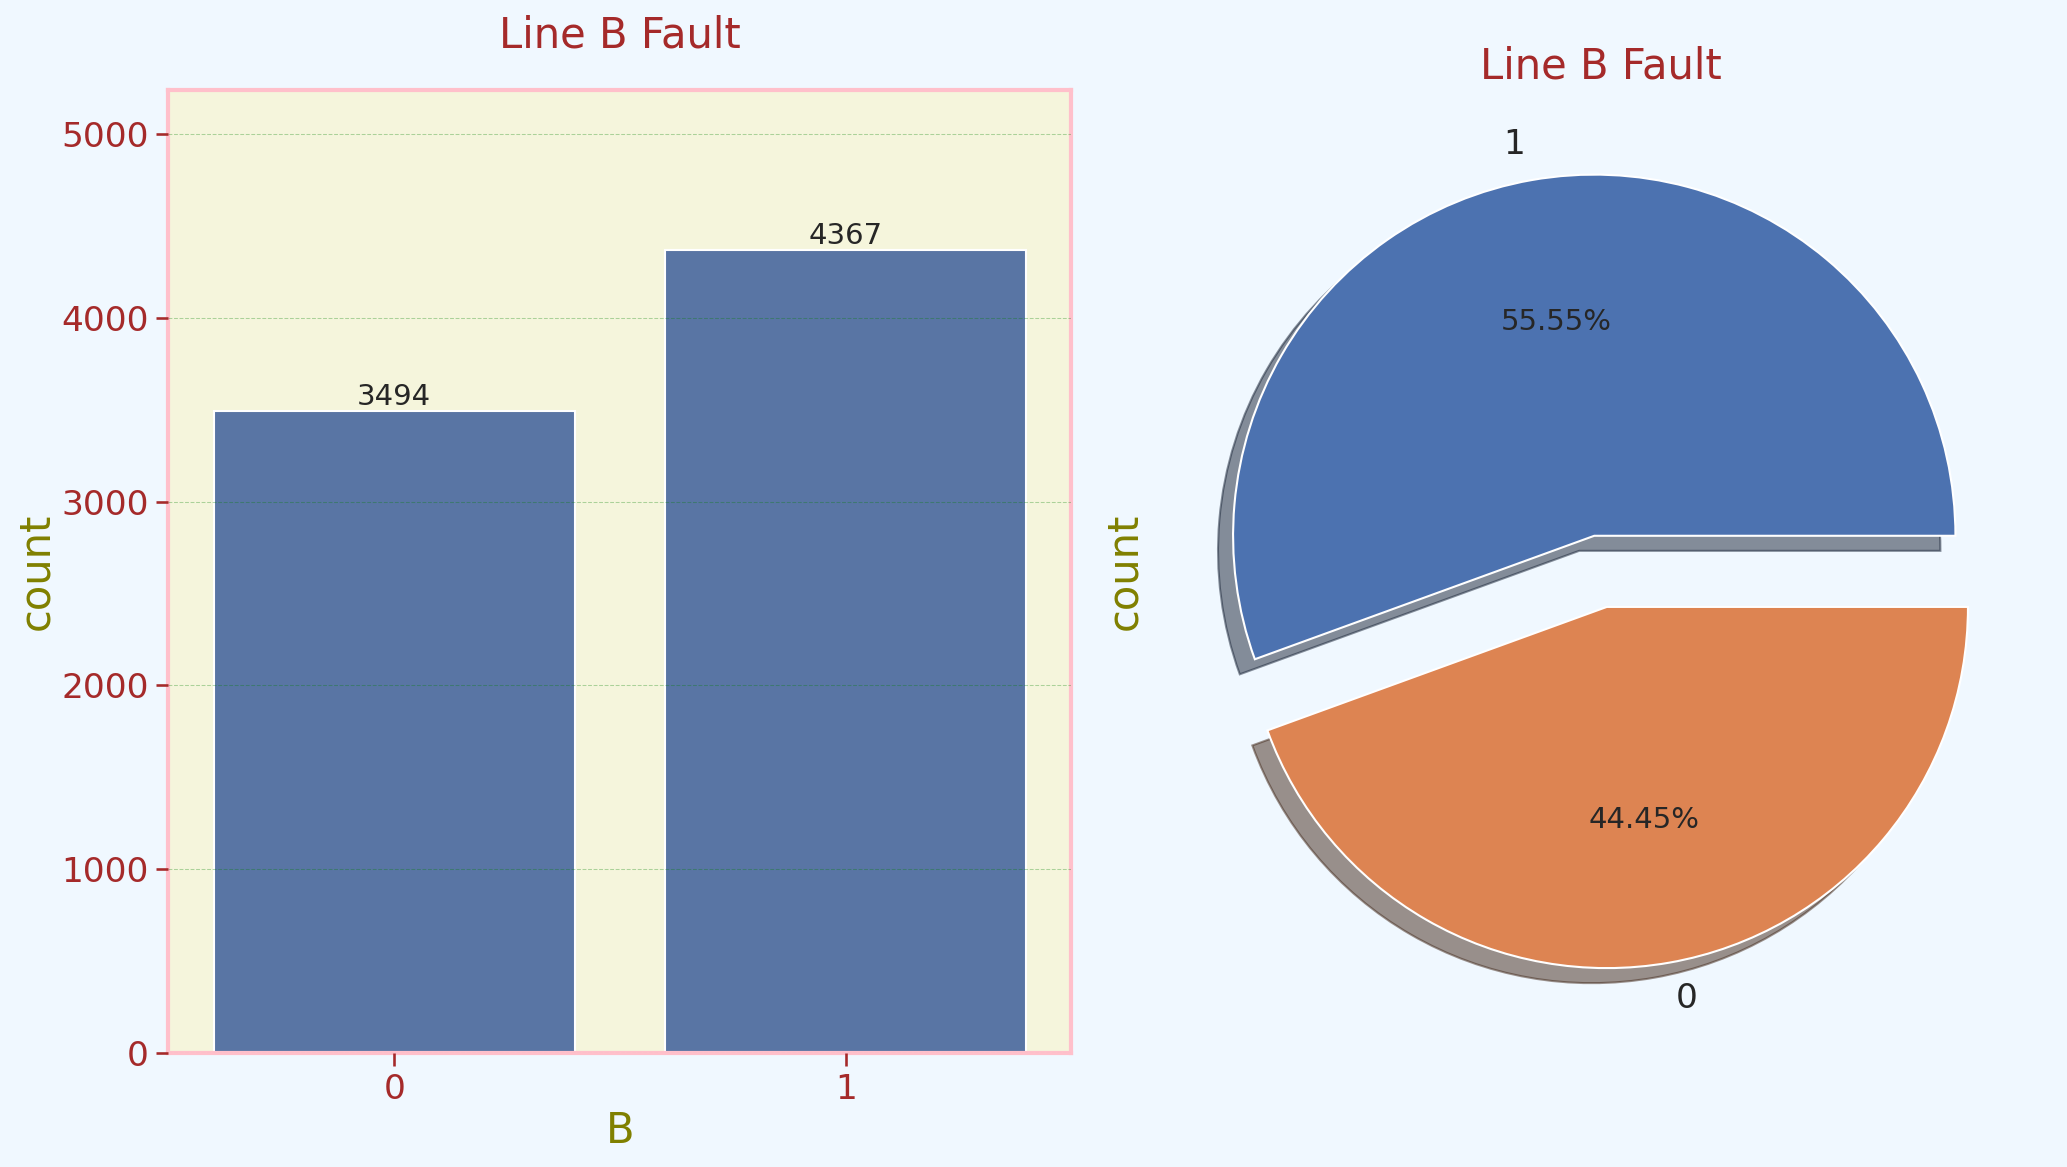

In [286]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='B', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Line B Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=df_class['B'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line B Fault", fontsize = 20,color='Brown',pad=20);

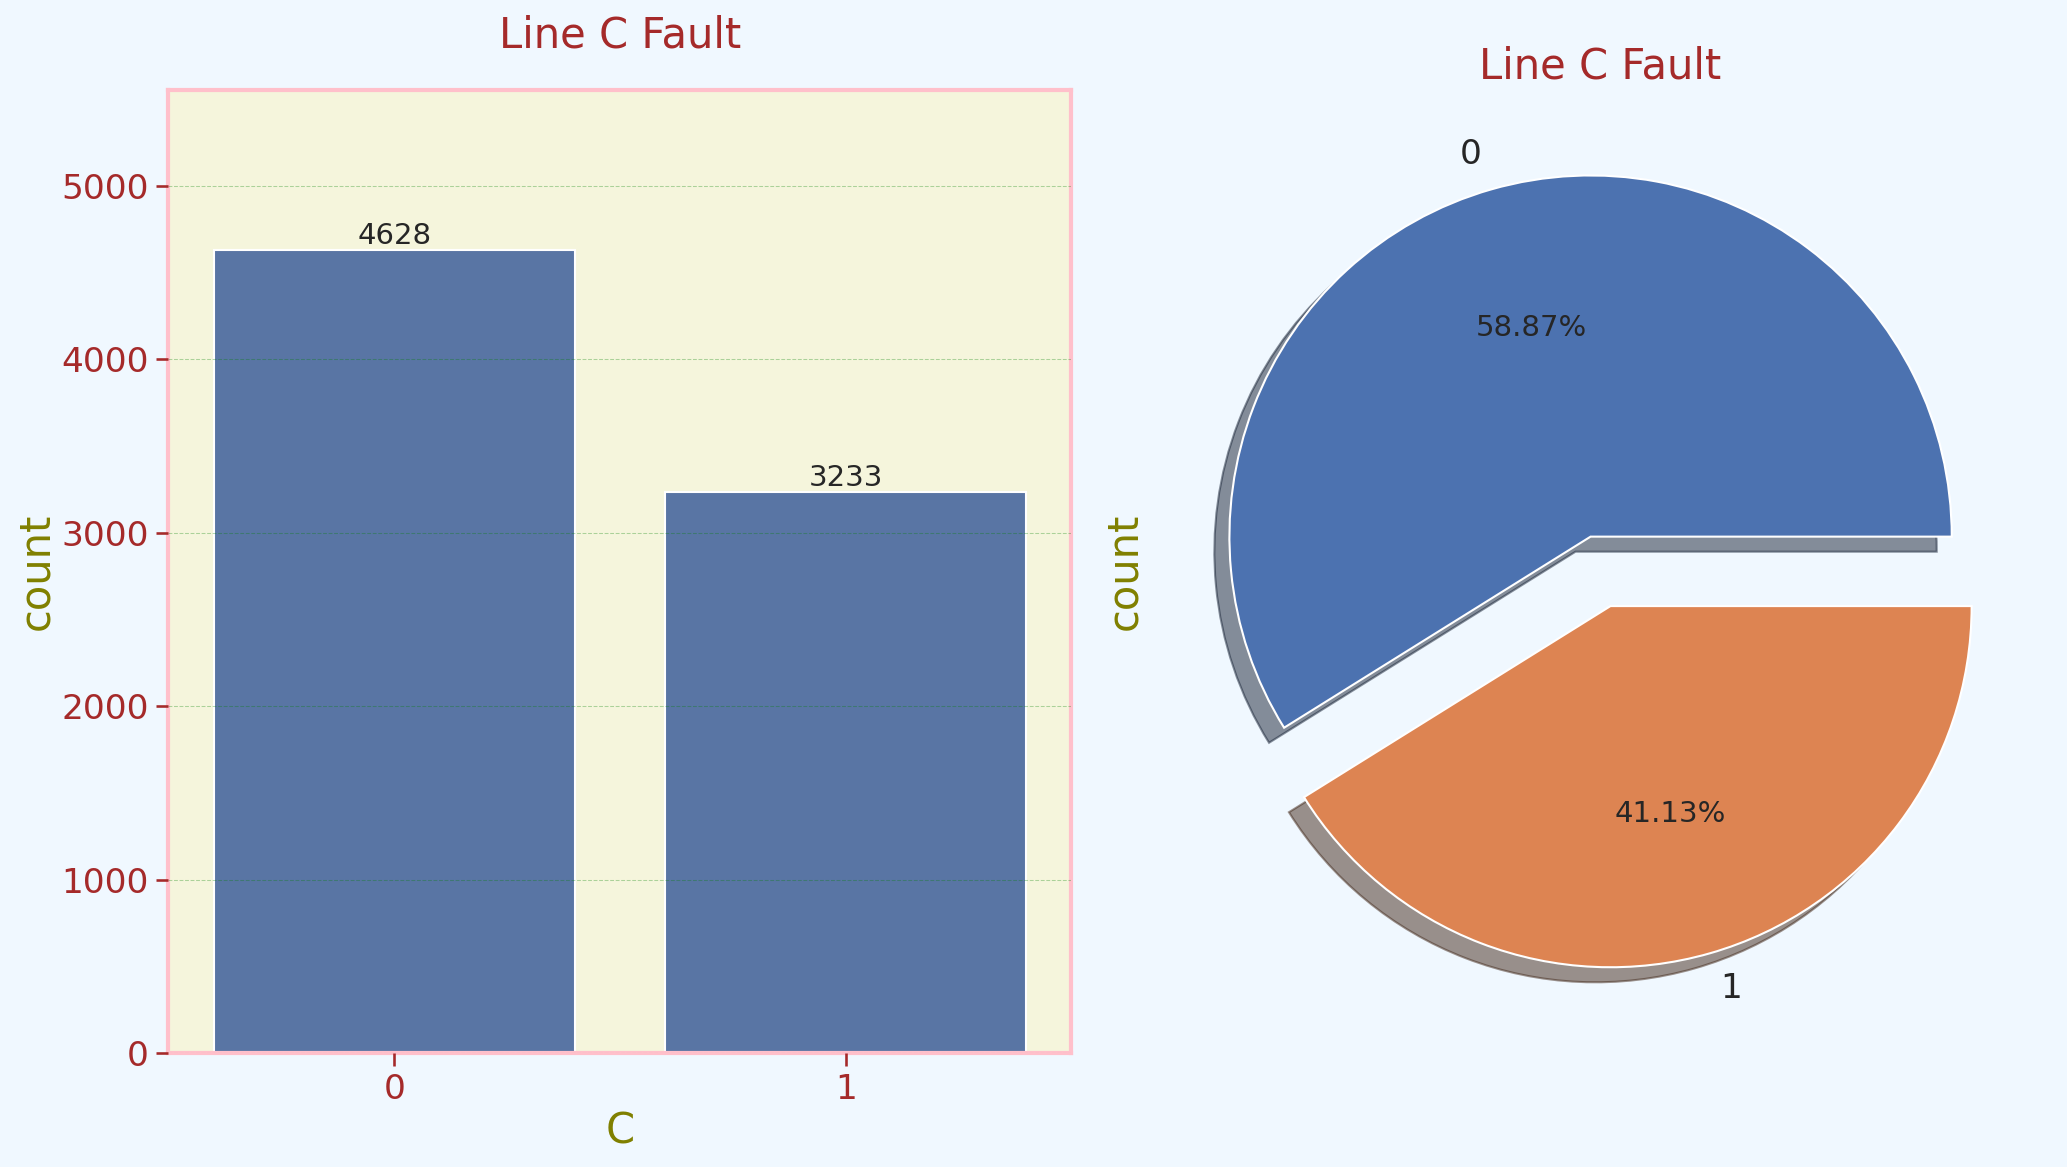

In [287]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='C', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Line C Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=df_class['C'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line C Fault", fontsize = 20,color='Brown',pad=20);

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Combing all fault together in one Fault_Type
</span>

In [288]:
df_class['Fault_Type'] = df_class['G'].astype('str') + df_class['C'].astype('str') + df_class['B'].astype('str') + df_class['A'].astype('str')
df_class.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Giving the proper name to the fault according to the data description provided above
</span>

In [289]:
df_class['Fault_Type'][df_class['Fault_Type'] == '0000' ] = 'NO Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
df_class['Fault_Type'][df_class['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

In [290]:
df_class.sample(10).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

In [291]:
#df_class.describe().style.set_precision(3).background_gradient(cmap='rainbow')

In [292]:
df_class['Fault_Type'].value_counts(ascending=False)

Fault_Type
NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C                    1096
Line B to Line C Fault                  1004
Name: count, dtype: int64

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Number of faults in the system according to their Fault_Type
</span>

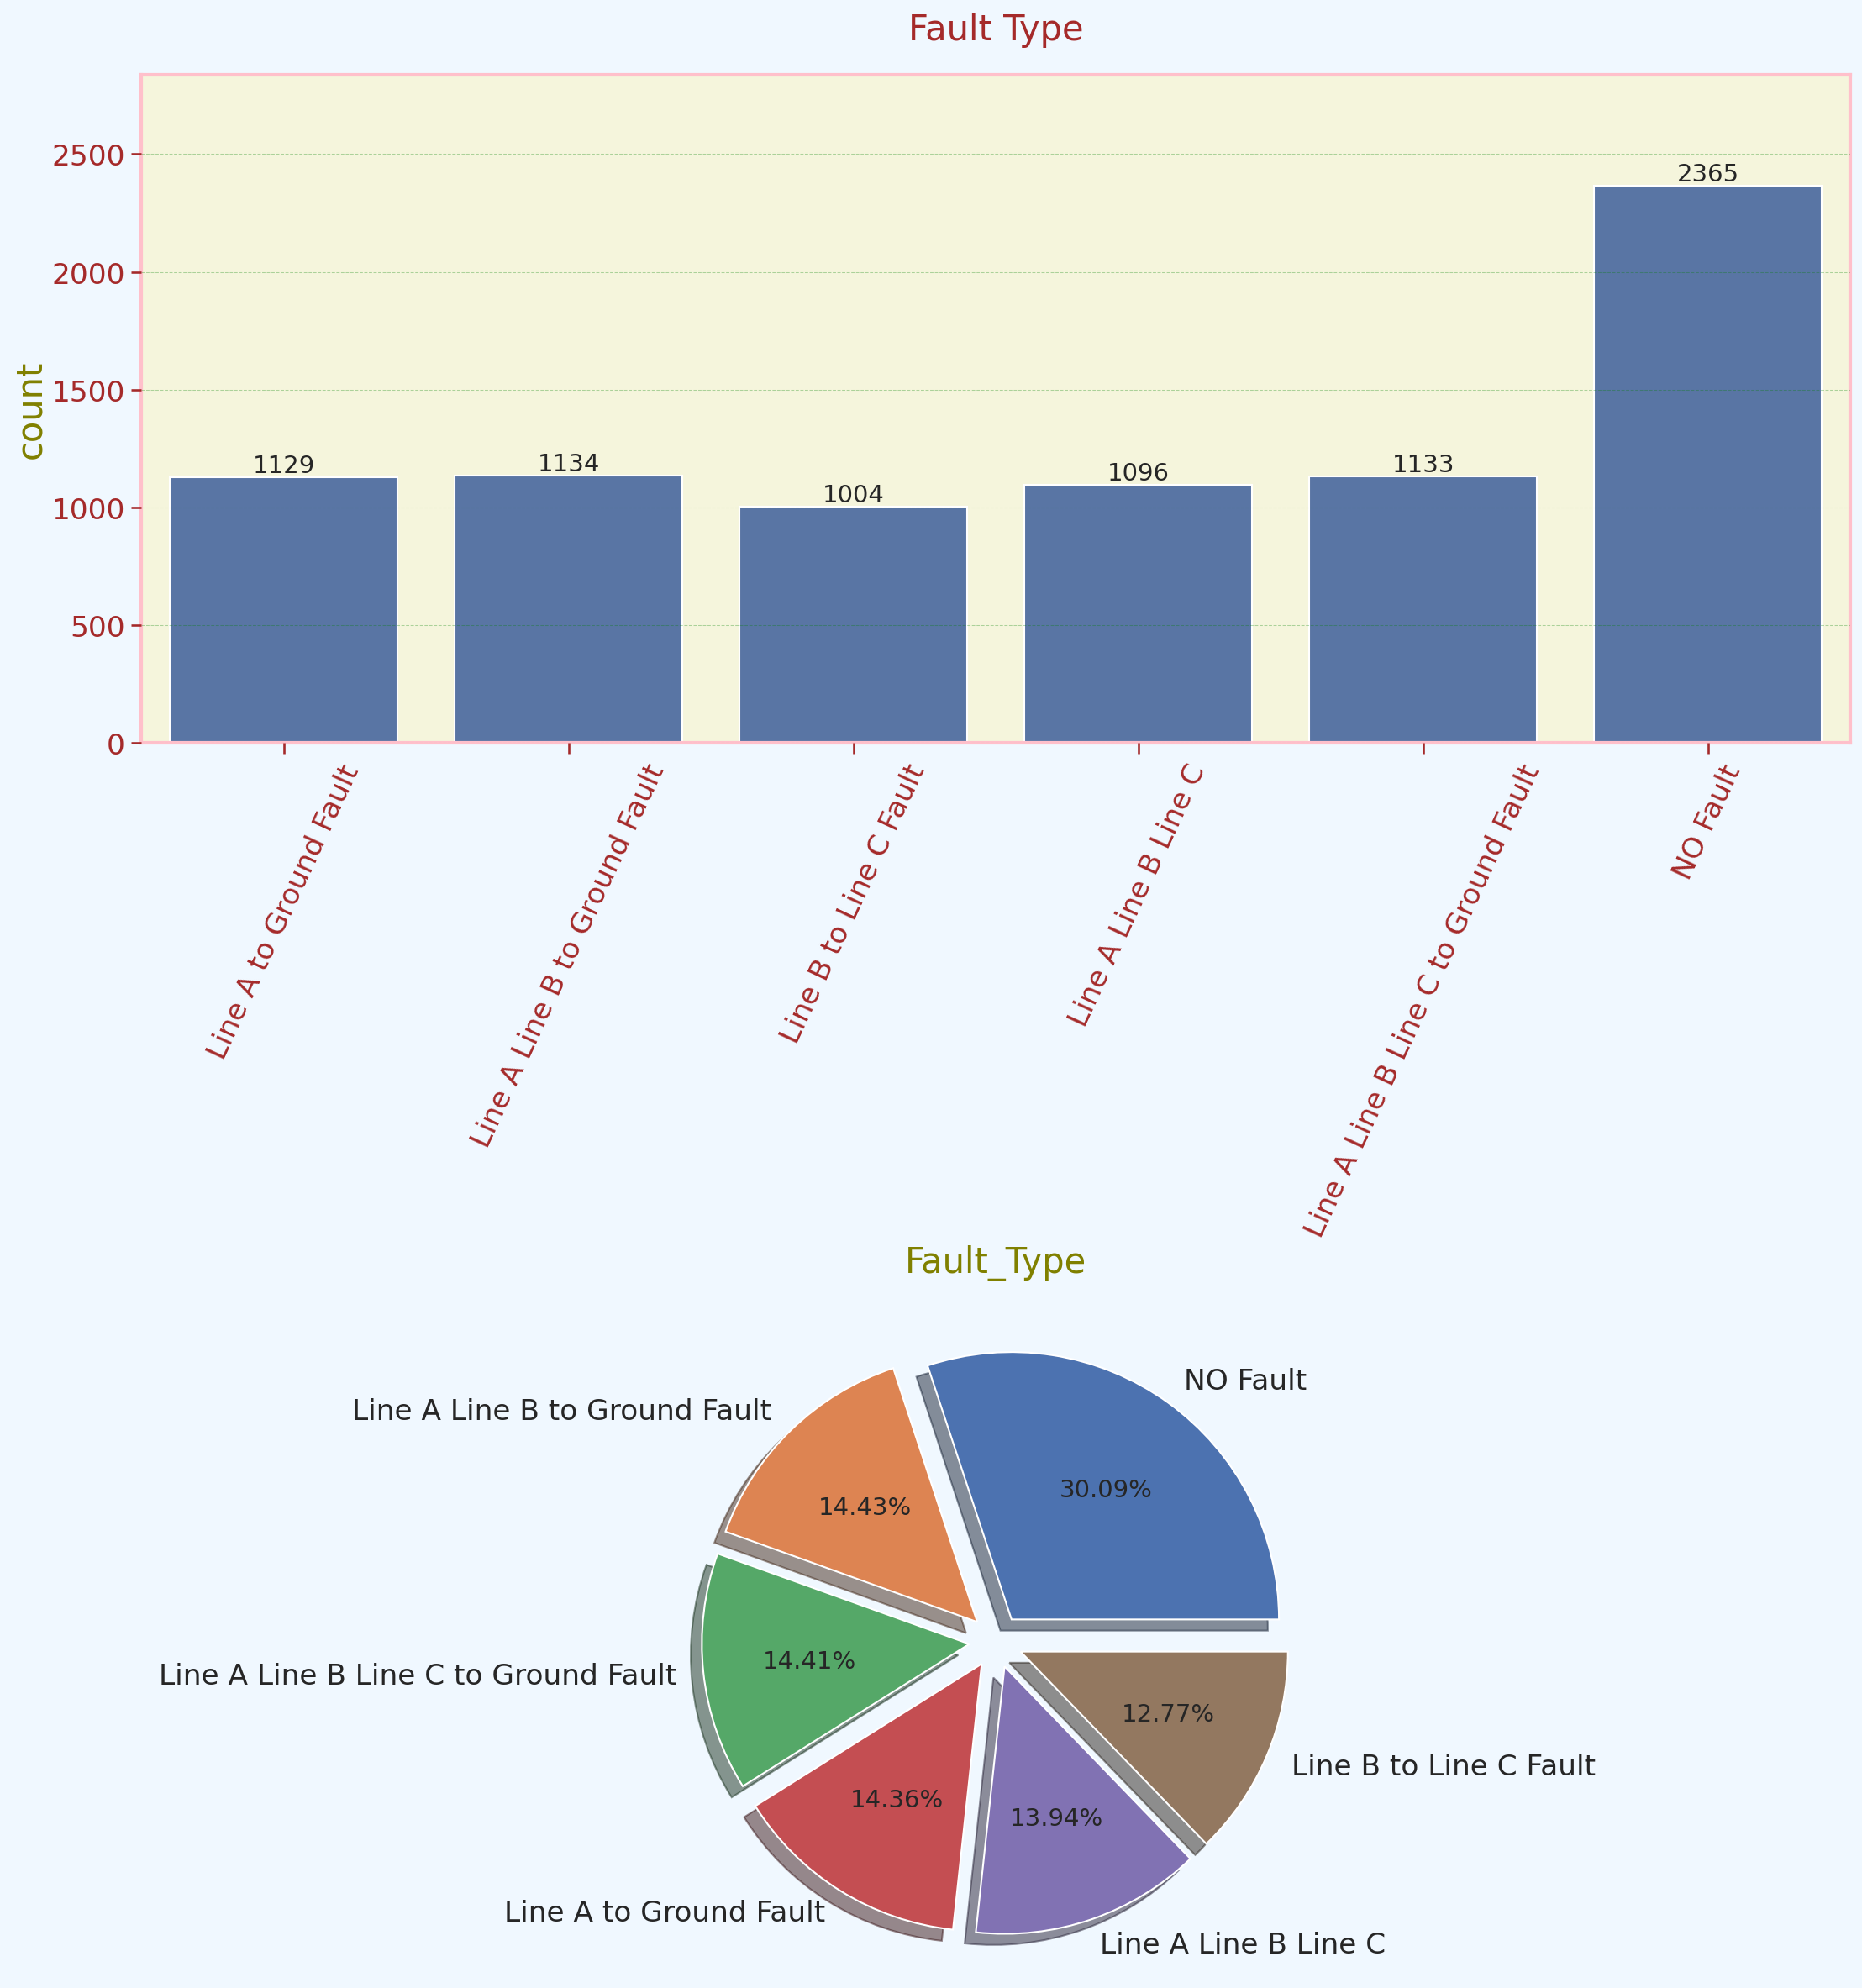

In [293]:
ax = plt.figure(figsize = (15,16))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='Fault_Type', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Fault Type", fontsize=20,color = 'Brown',pad=20)
plt.xticks(rotation=65)
plt.tight_layout()

ax =plt.subplot(2,1,2)
ax=df_class['Fault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
plt.tight_layout()
plt.axis('off');

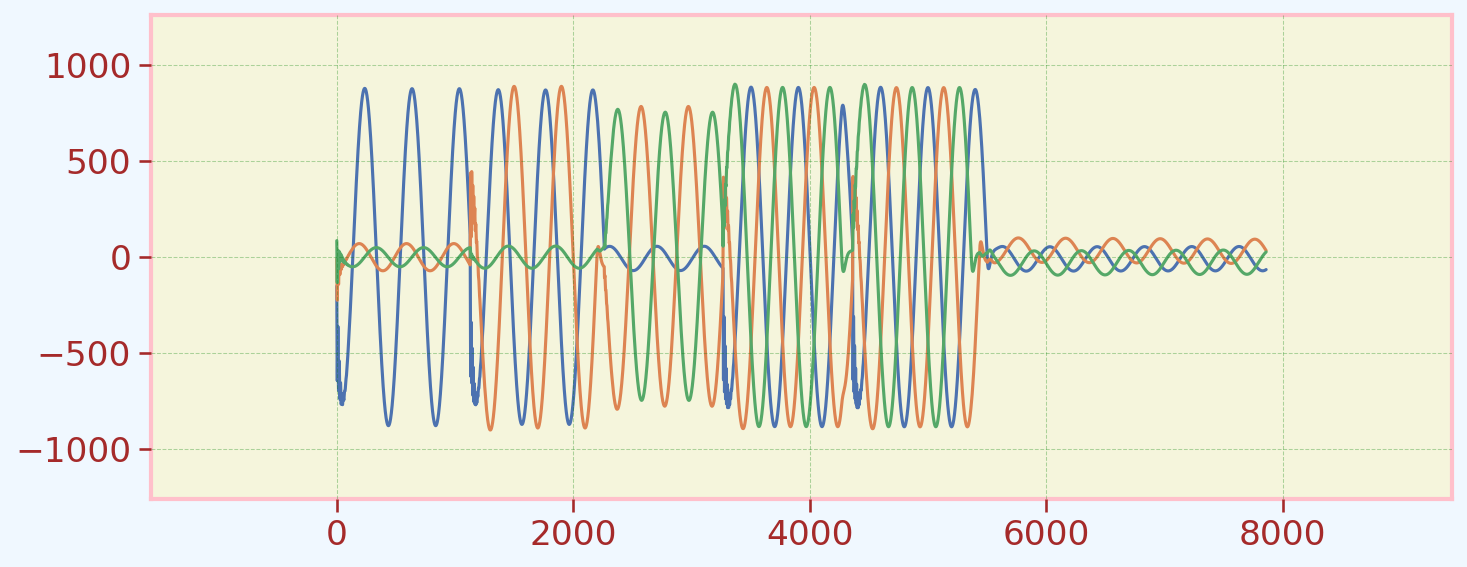

In [294]:
plt.figure(figsize = (10,4))
plt.plot(df_class["Ia"])
plt.plot(df_class["Ib"])
plt.plot(df_class["Ic"]);

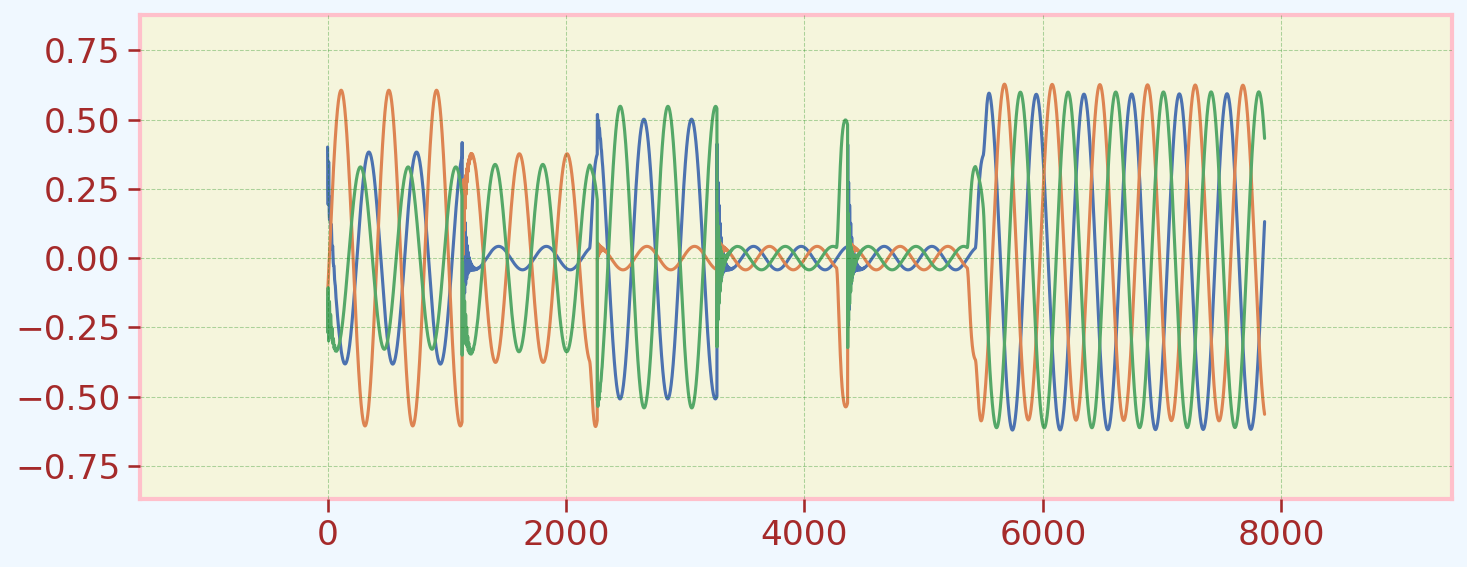

In [295]:
plt.figure(figsize = (10,4))
plt.plot(df_class["Va"])
plt.plot(df_class["Vb"])
plt.plot(df_class["Vc"]);

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
Voltage or Current graph, where there is large fluctuation in the graph, there faults have occurred
    </p>
</div>

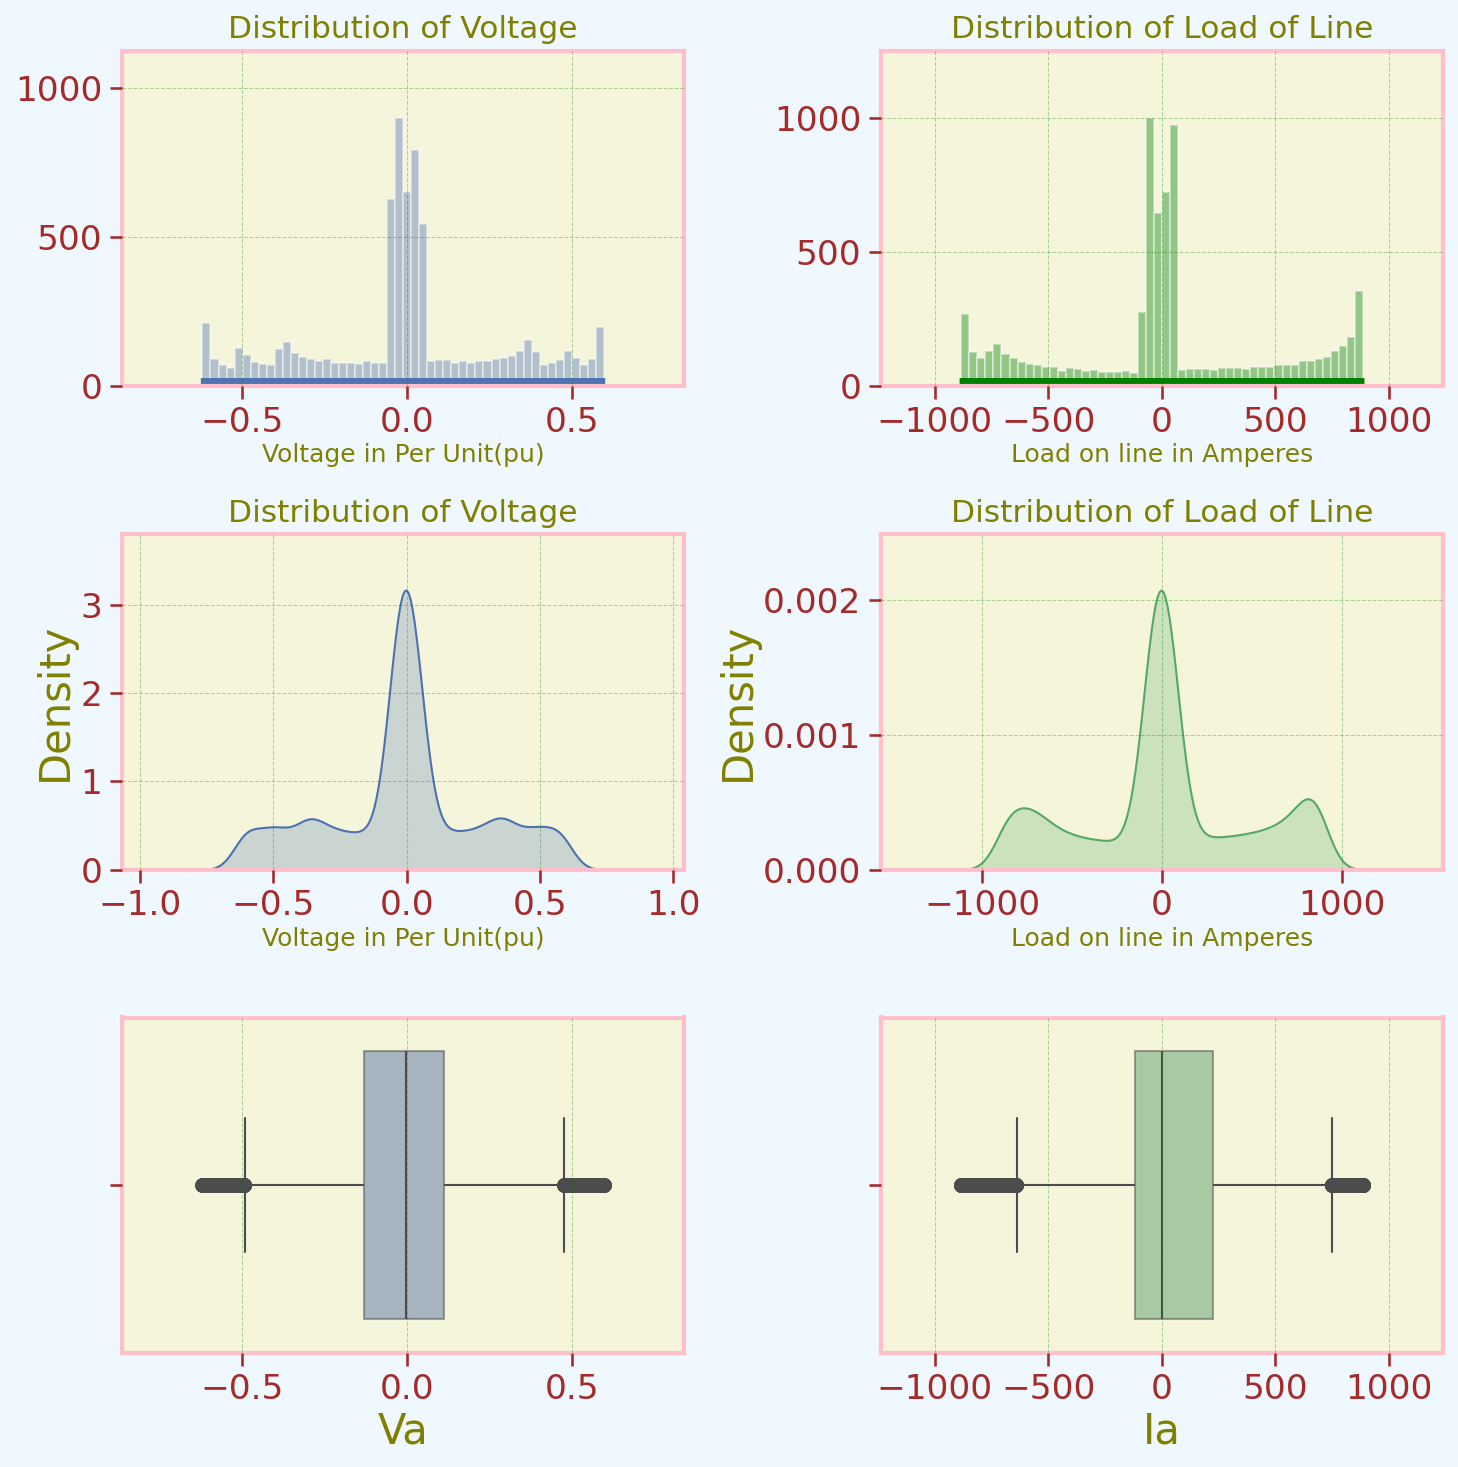

In [296]:
plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(df_class['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(df_class['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(df_class['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(df_class['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = df_class['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = df_class['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()

<h1 style="background-color:black
;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 150px 150px; color:#40E0D0"> Separating Faults into different Categories</h1><a id=0></a>

<span style="background-color:red;
             color:white;
             font-size:25px;
             text-align:center;
             border-radius:50px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">1. No Fault (Healthy System)
</span>

In [297]:
No_Fault = df_class[df_class['Fault_Type'] == 'NO Fault' ]
No_Fault.sample(5).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

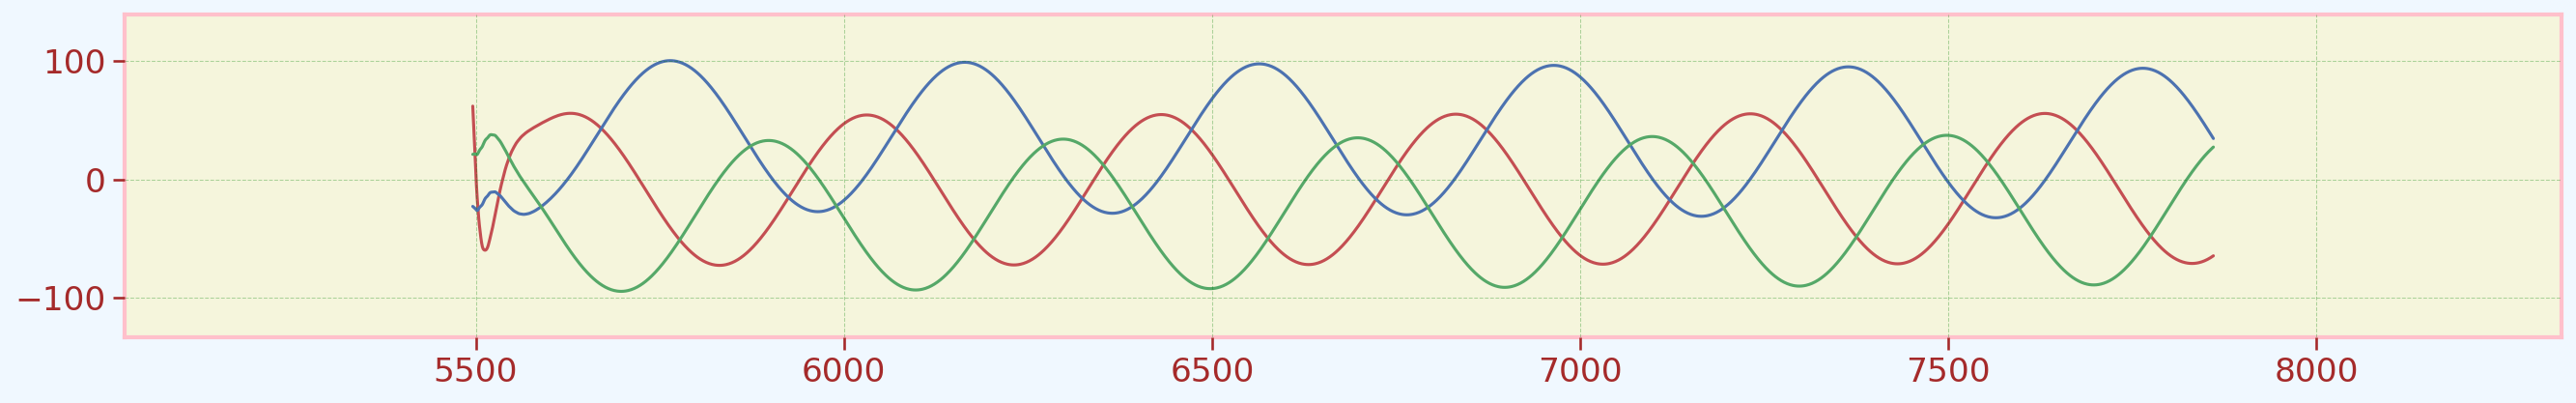

In [298]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Ia"],'r')
ax = plt.plot(No_Fault["Ib"],'b')
ax = plt.plot(No_Fault["Ic"],'g');

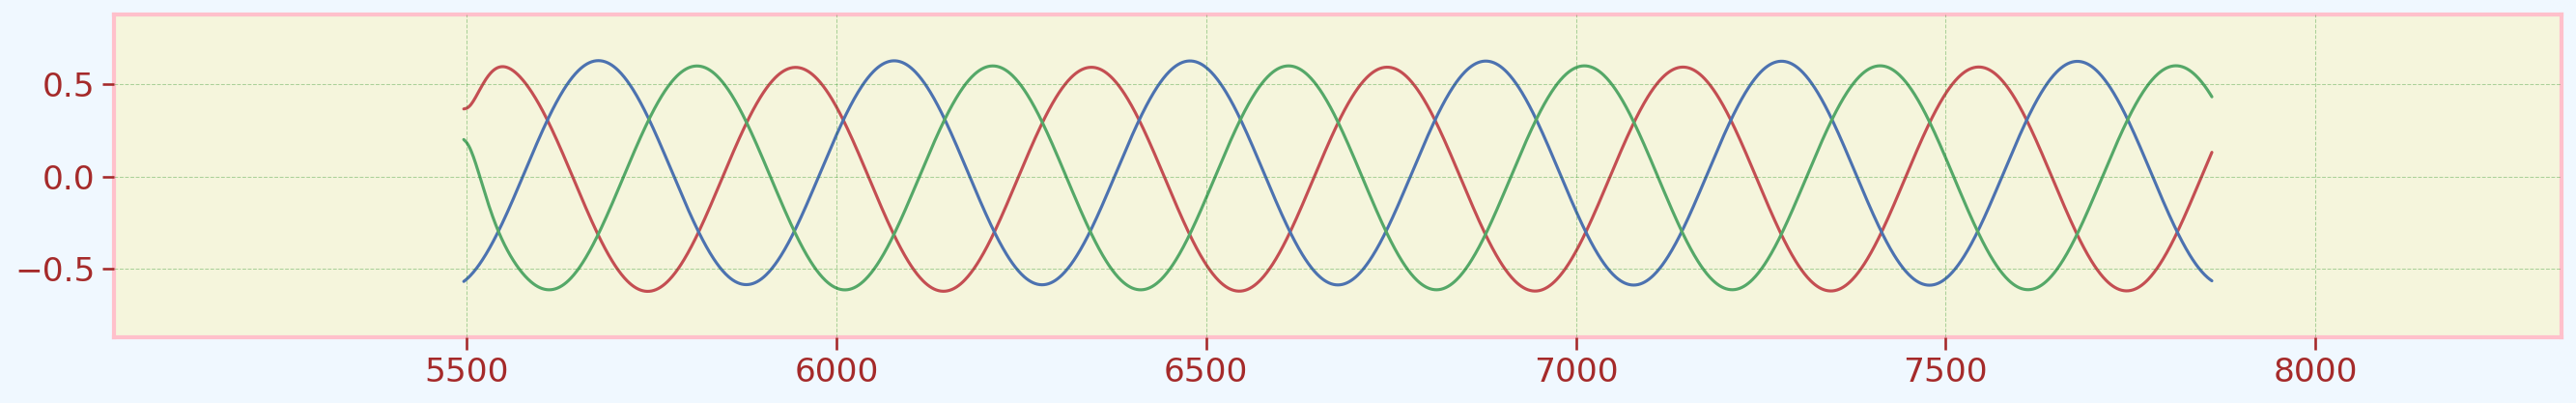

In [299]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Va"],'r')
ax = plt.plot(No_Fault["Vb"],'b')
ax = plt.plot(No_Fault["Vc"],'g');

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
In a normal (No_Fault) condition Voltage or Current graph, is symmetrical and sinusoidal in nature with current and voltage 120 degree in phase shift and maximum current is approximately +100 to -100 Amperes and voltage +0.5 pu to -0.5pu
    </p>
</div>

<center> <img src="https://circuitglobe.com/wp-content/uploads/2015/10/resistive-circuit-waveform-compressor2.jpg" width="600" height="200"> </center>

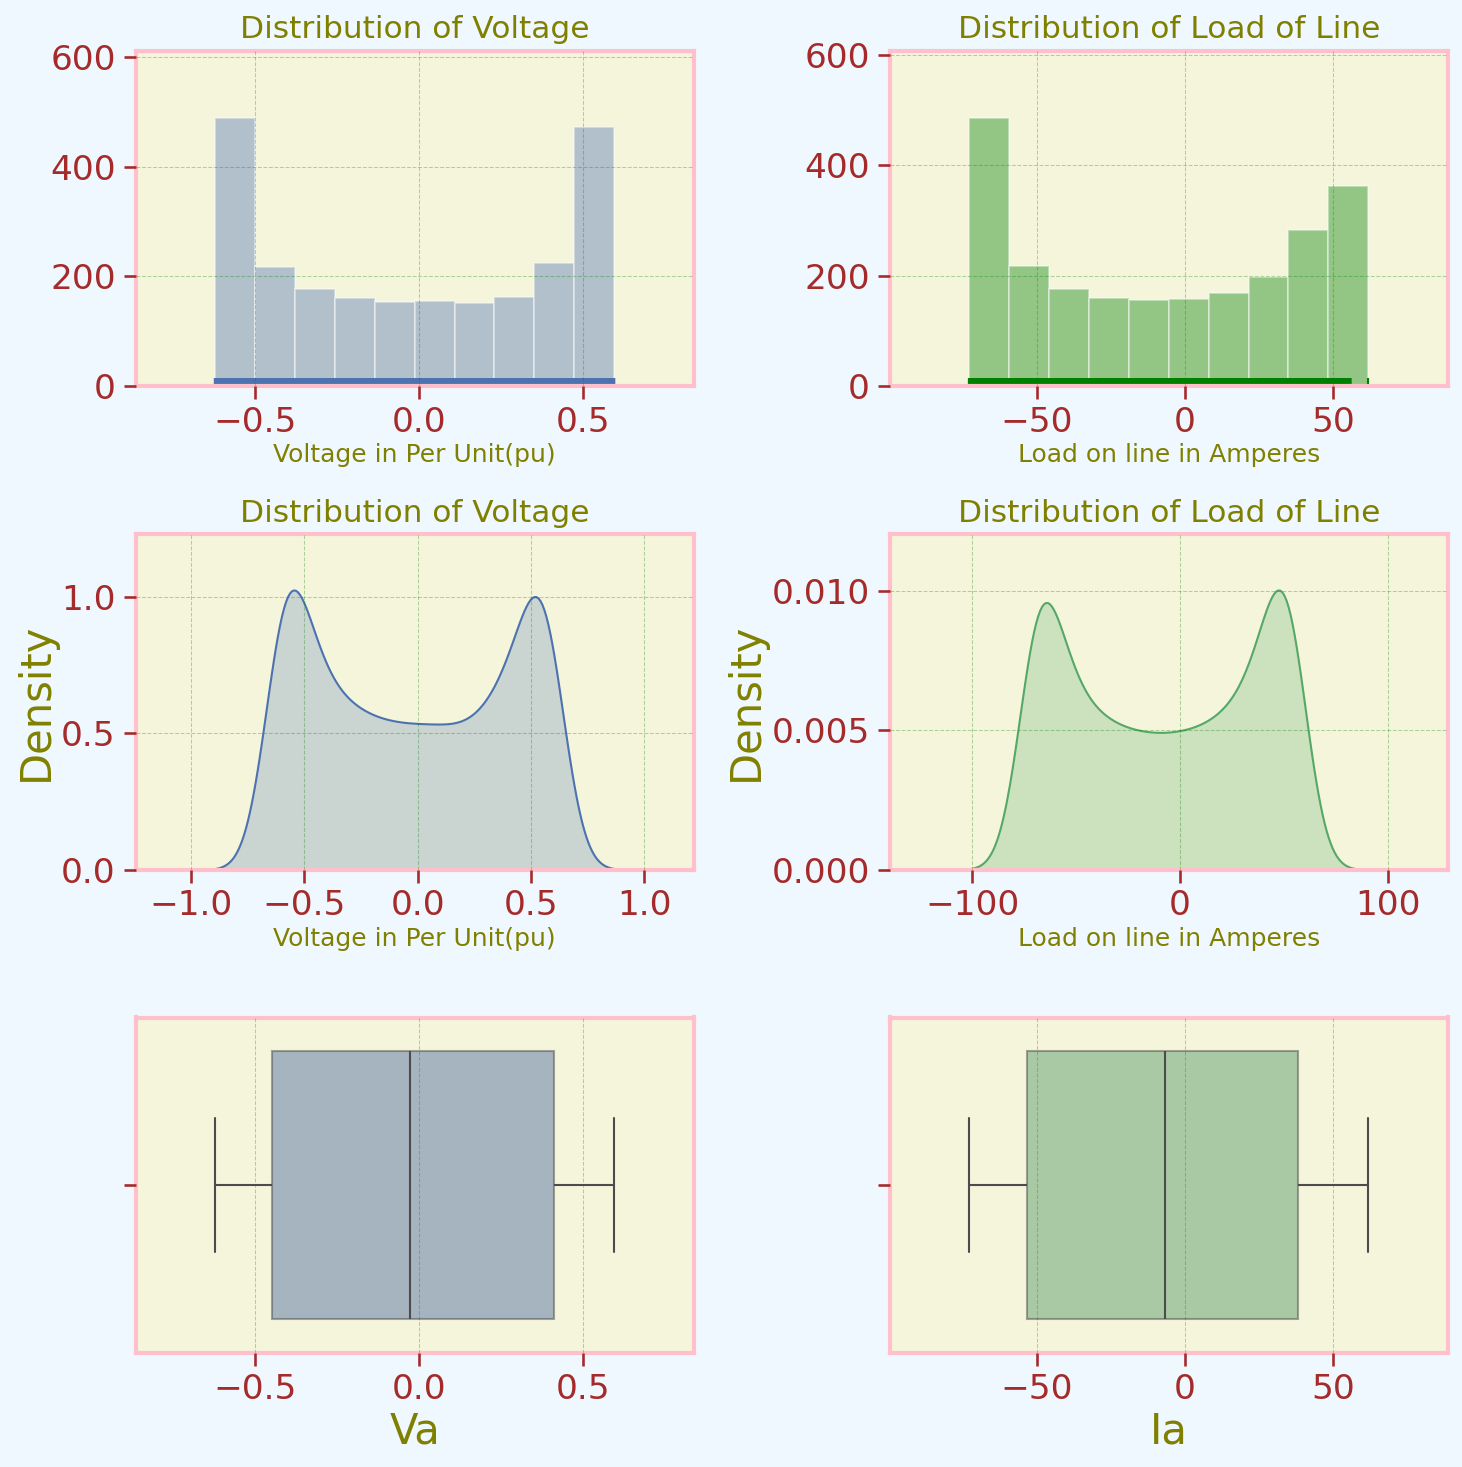

In [300]:
plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(No_Fault['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(No_Fault['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(No_Fault['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(No_Fault['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = No_Fault['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = No_Fault['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()

<span style="background-color:red;
             color:white;
             font-size:25px;
             text-align:center;
             border-radius:50px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">2. Faulty System with Line A to Ground Fault
</span>

In [301]:
Line_AG_Fault = df_class[df_class['Fault_Type'] == 'Line A to Ground Fault' ]
Line_AG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

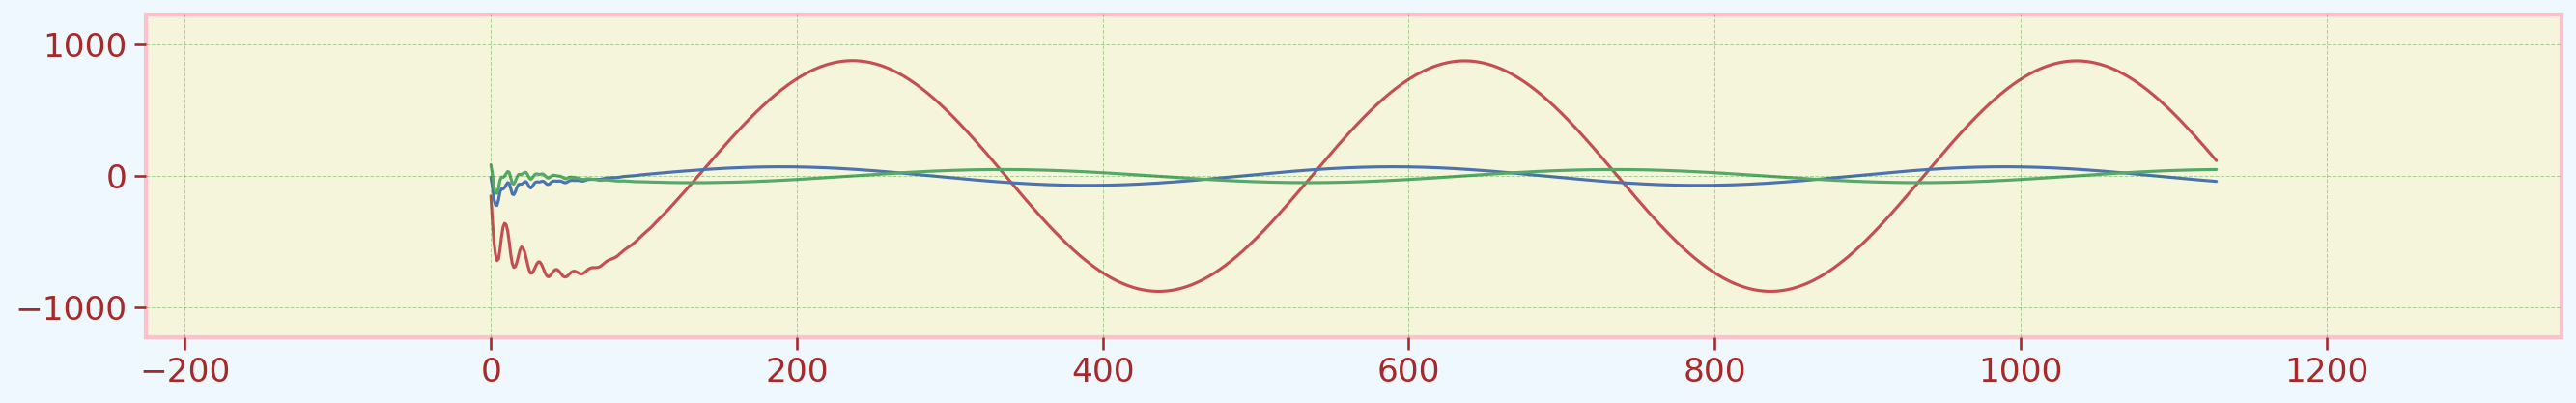

In [302]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Ia"],'r')
ax = plt.plot(Line_AG_Fault["Ib"],'b')
ax = plt.plot(Line_AG_Fault["Ic"],'g');

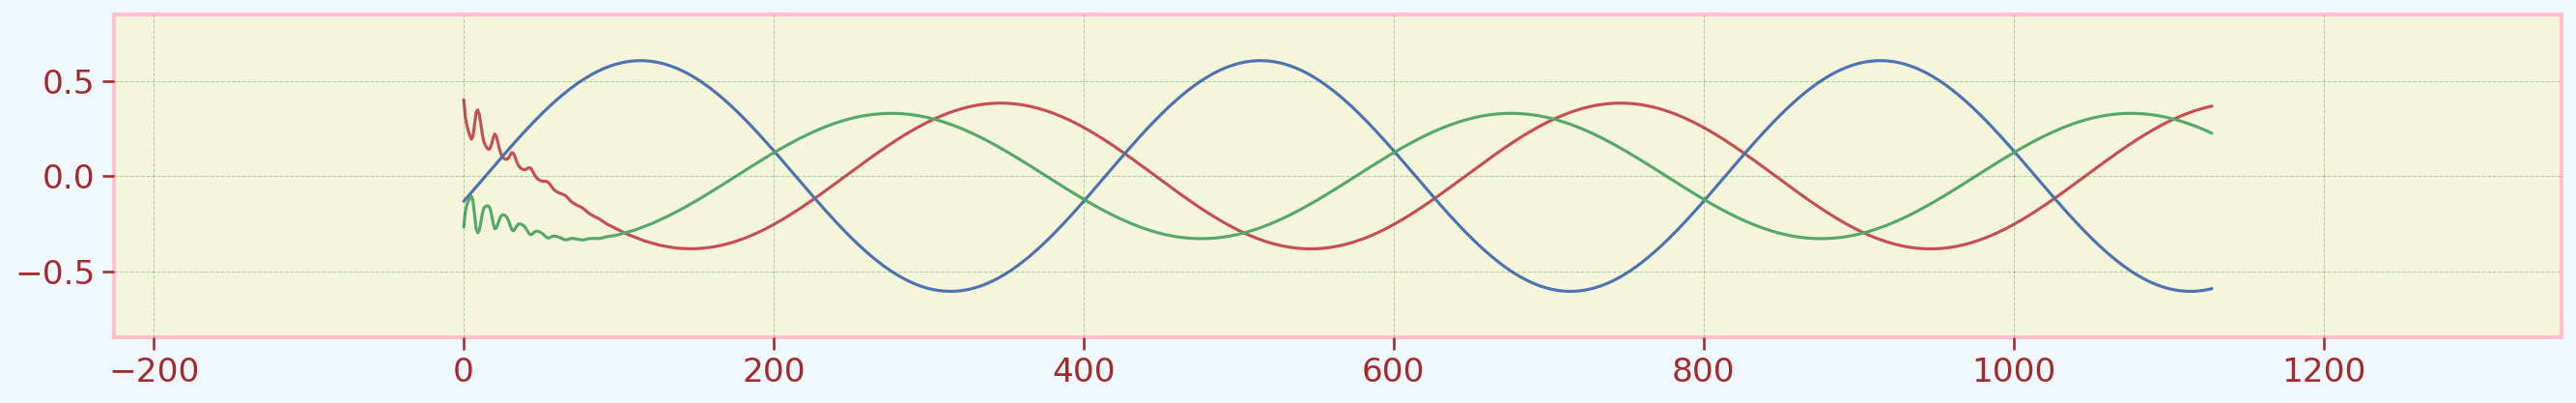

In [303]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Va"],'r')
ax = plt.plot(Line_AG_Fault["Vb"],'b')
ax = plt.plot(Line_AG_Fault["Vc"],'g');

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
At a time of Line A to grounf fault the current in line A increases to 10 fold approximately 1000 Ampears form normal 100 Ampears and voltage reduced.
    </p>
</div>

<span style="background-color:red;
             color:white;
             font-size:25px;
             text-align:center;
             border-radius:50px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">3. Faulty System with Line A ,Line B to Ground Fault
</span>

In [304]:
Line_ABG_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B to Ground Fault' ]
Line_ABG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

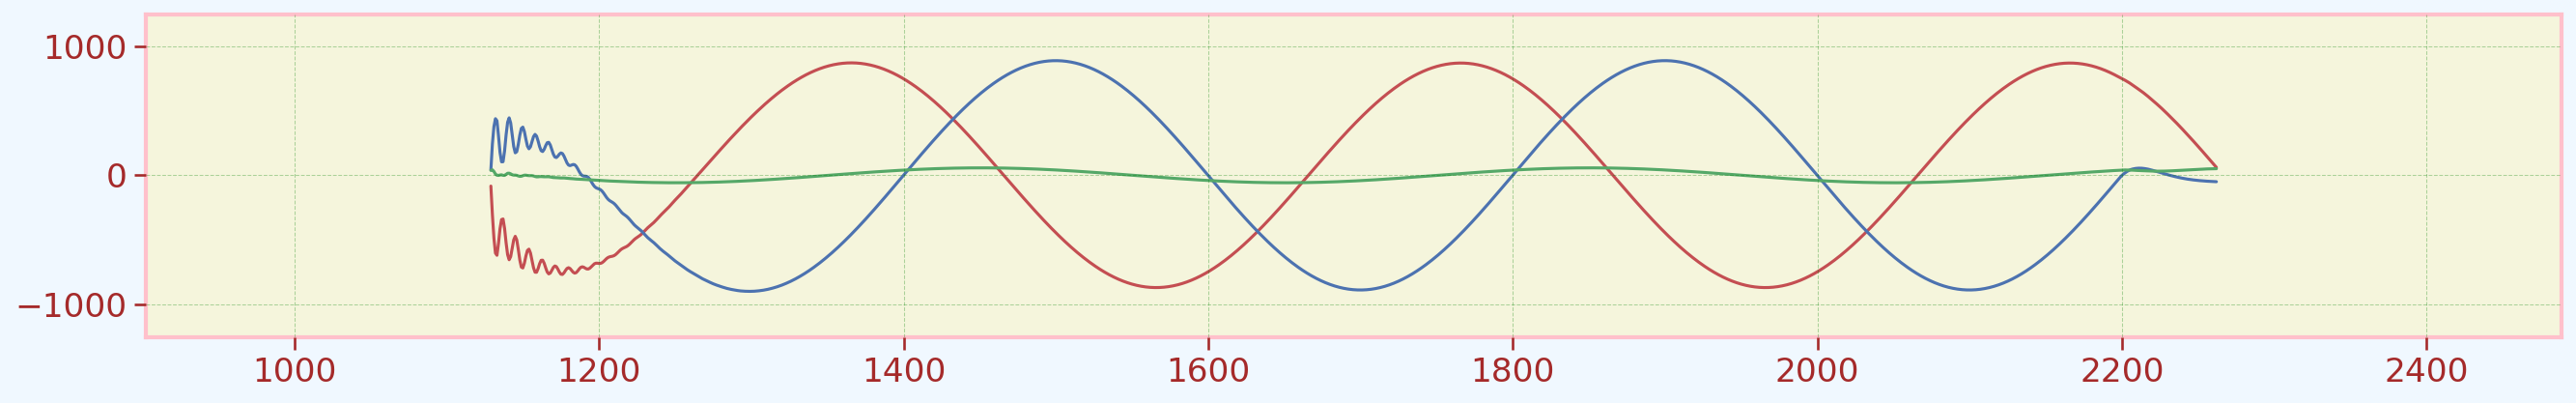

In [305]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Ia"],'r')
ax = plt.plot(Line_ABG_Fault["Ib"],'b')
ax = plt.plot(Line_ABG_Fault["Ic"],'g');

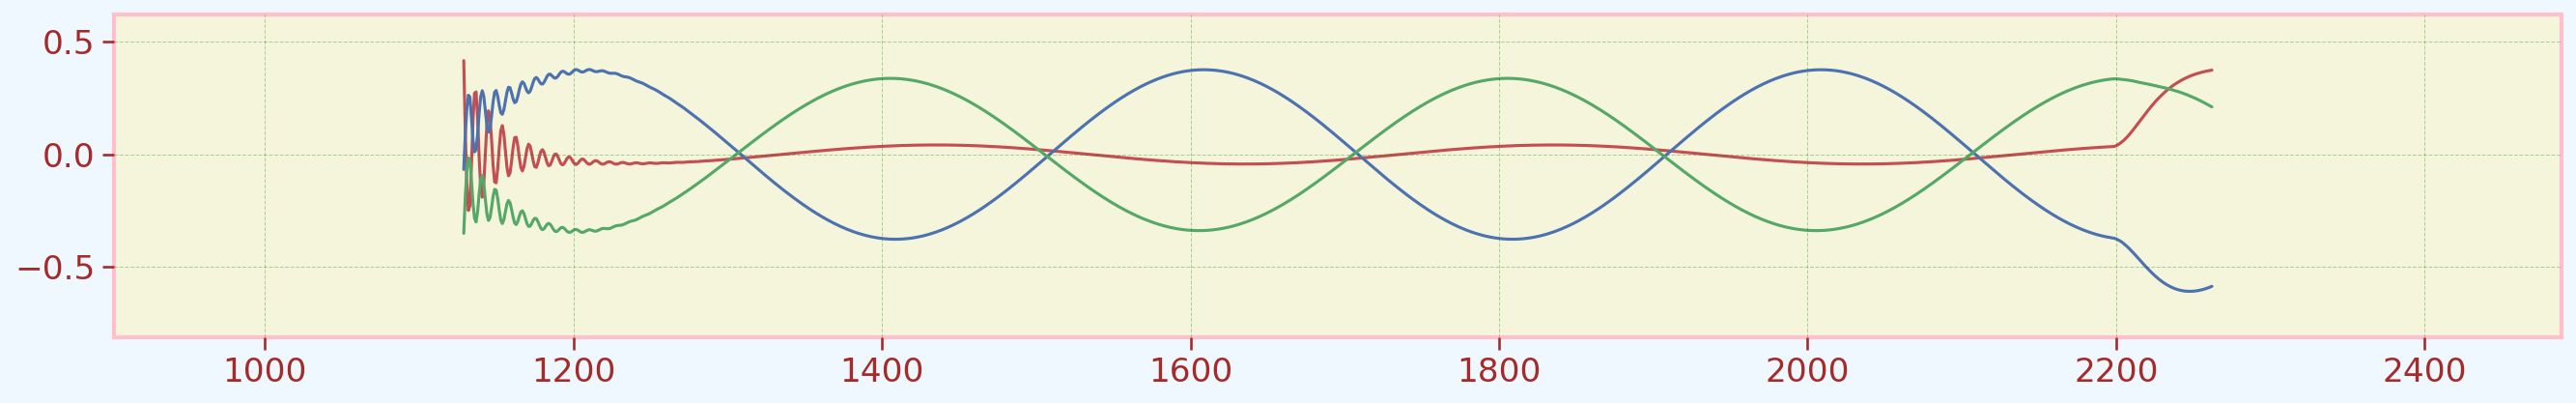

In [306]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Va"],'r')
ax = plt.plot(Line_ABG_Fault["Vb"],'b')
ax = plt.plot(Line_ABG_Fault["Vc"],'g');

<span style="background-color:red;
             color:white;
             font-size:25px;
             text-align:center;
             border-radius:50px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">4. Faulty System with Line B to Line C
</span>

In [307]:
Line_BC_Fault = df_class[df_class['Fault_Type'] == 'Line B to Line C Fault' ]
Line_BC_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

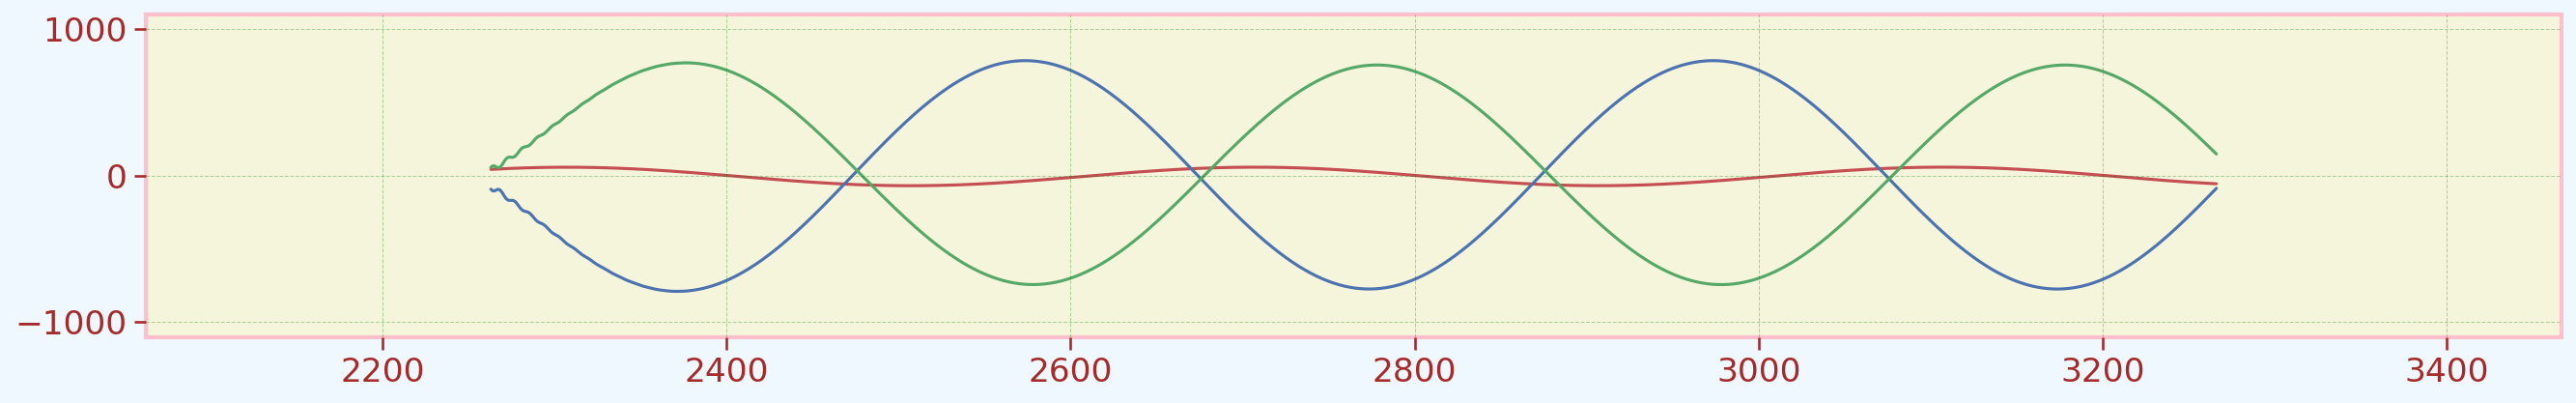

In [308]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Ia"],'r')
ax = plt.plot(Line_BC_Fault["Ib"],'b')
ax = plt.plot(Line_BC_Fault["Ic"],'g');

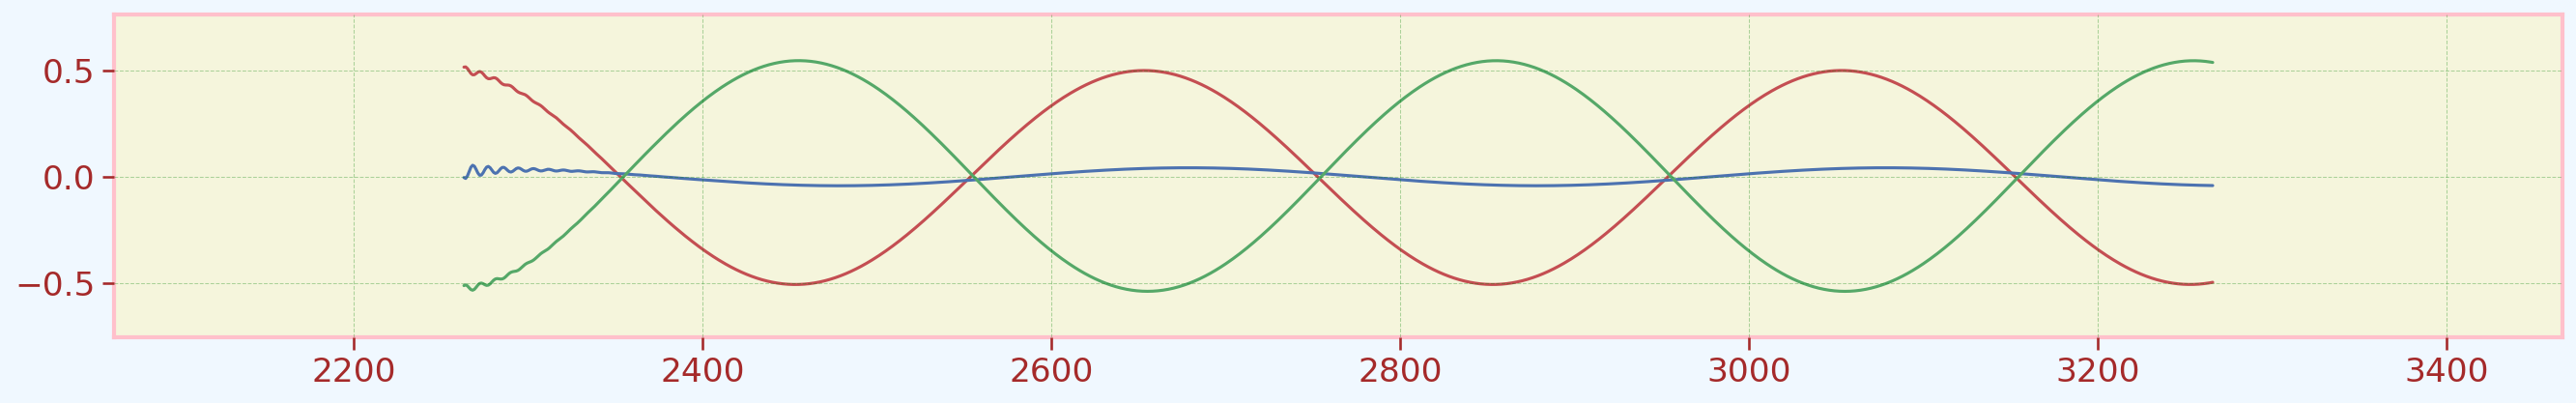

In [309]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Va"],'r')
ax = plt.plot(Line_BC_Fault["Vb"],'b')
ax = plt.plot(Line_BC_Fault["Vc"],'g');

<span style="background-color:red;
             color:white;
             font-size:25px;
             text-align:center;
             border-radius:50px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">5. Faulty System with Line A - Line B - Line C
</span>

In [310]:
Line_ABC_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B Line C' ]
Line_ABC_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

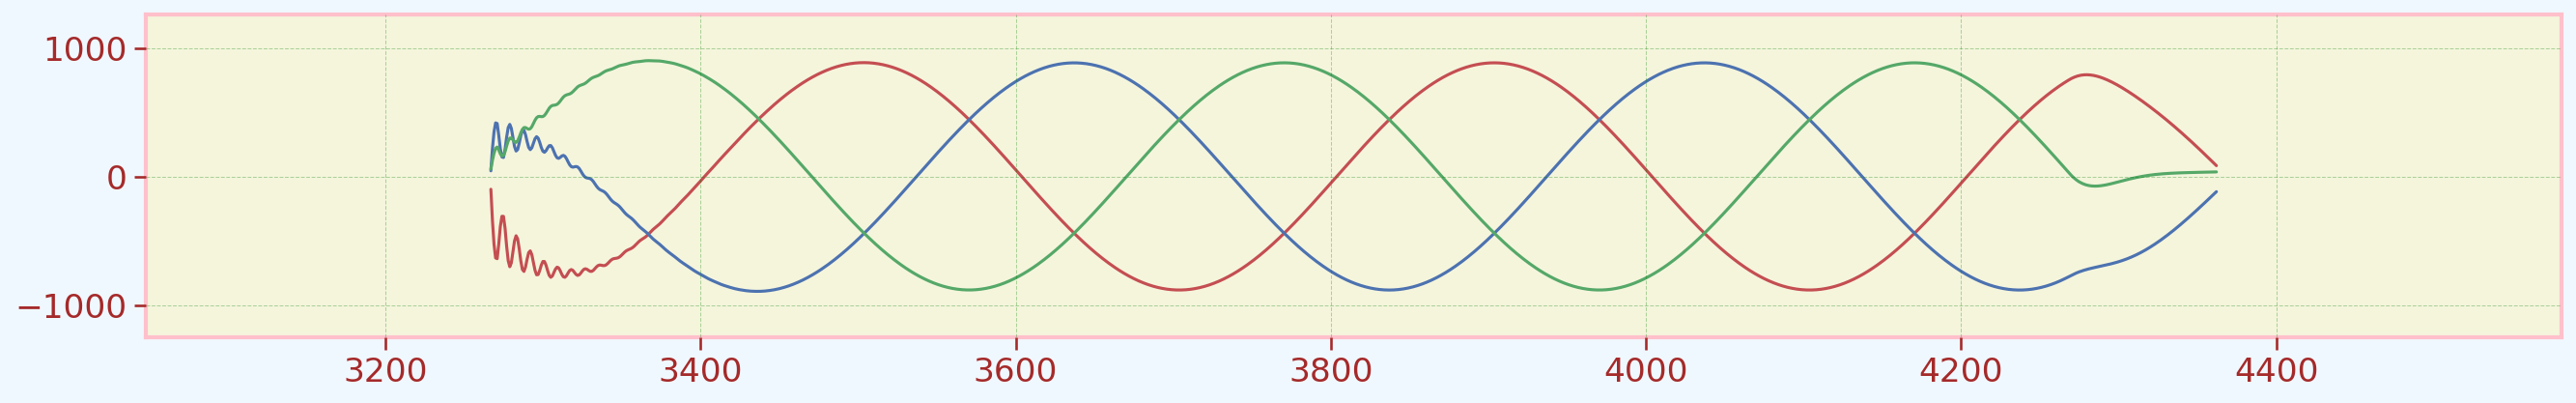

In [311]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Ia"],'r')
ax = plt.plot(Line_ABC_Fault["Ib"],'b')
ax = plt.plot(Line_ABC_Fault["Ic"],'g');

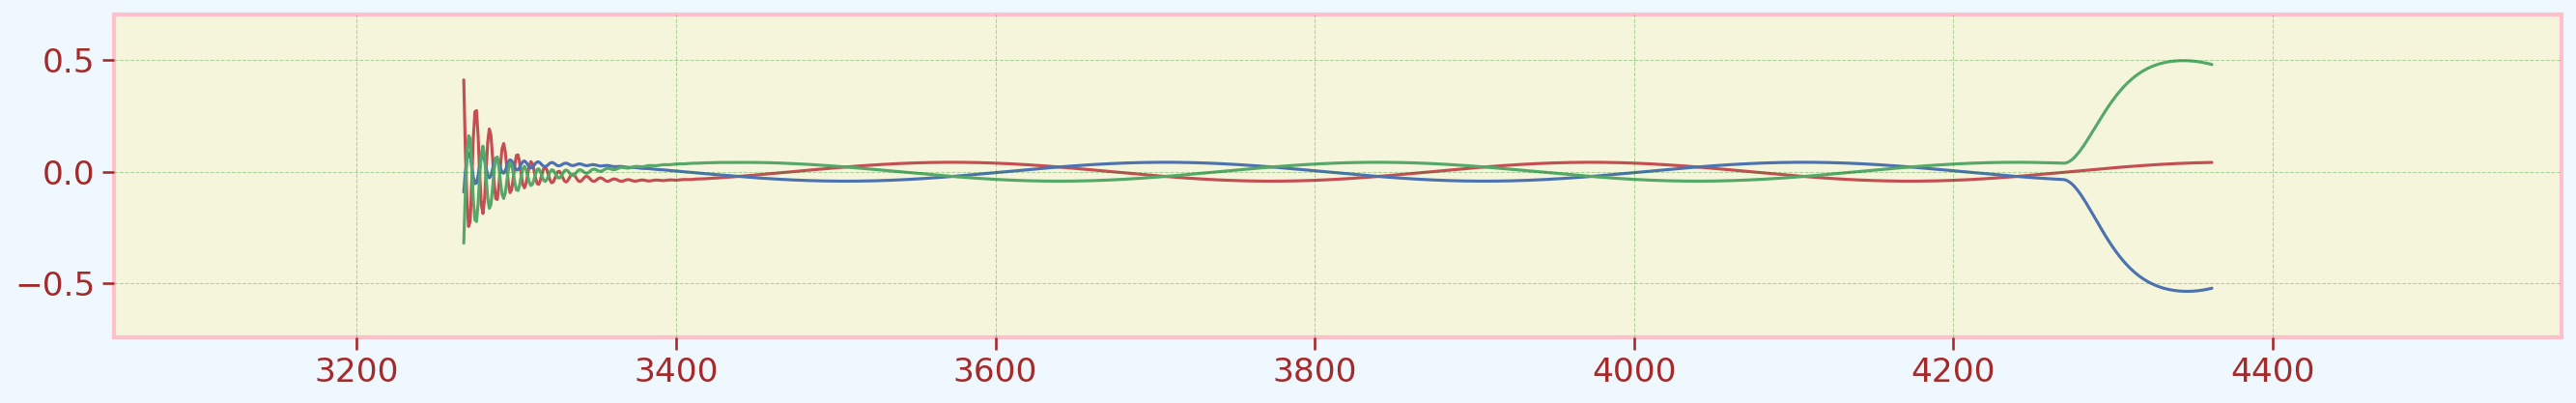

In [312]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Va"],'r')
ax = plt.plot(Line_ABC_Fault["Vb"],'b')
ax = plt.plot(Line_ABC_Fault["Vc"],'g');

<span style="background-color:red;
             color:white;
             font-size:25px;
             text-align:center;
             border-radius:50px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">6. Faulty System with Line A - Line B - Line C - Ground
</span>

In [313]:
Line_ABCG_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B Line C to Ground Fault' ]
Line_ABCG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

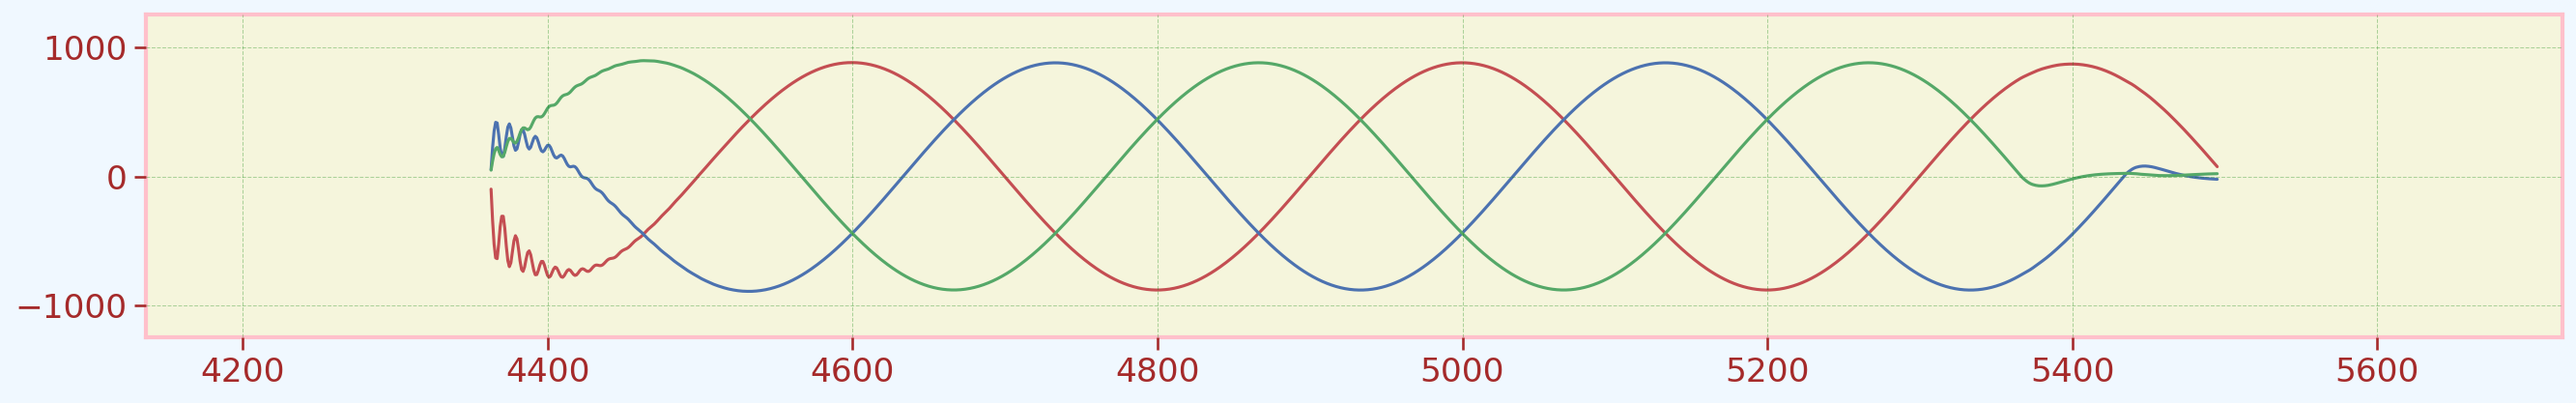

In [314]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABCG_Fault["Ia"],'r')
ax = plt.plot(Line_ABCG_Fault["Ib"],'b')
ax = plt.plot(Line_ABCG_Fault["Ic"],'g');

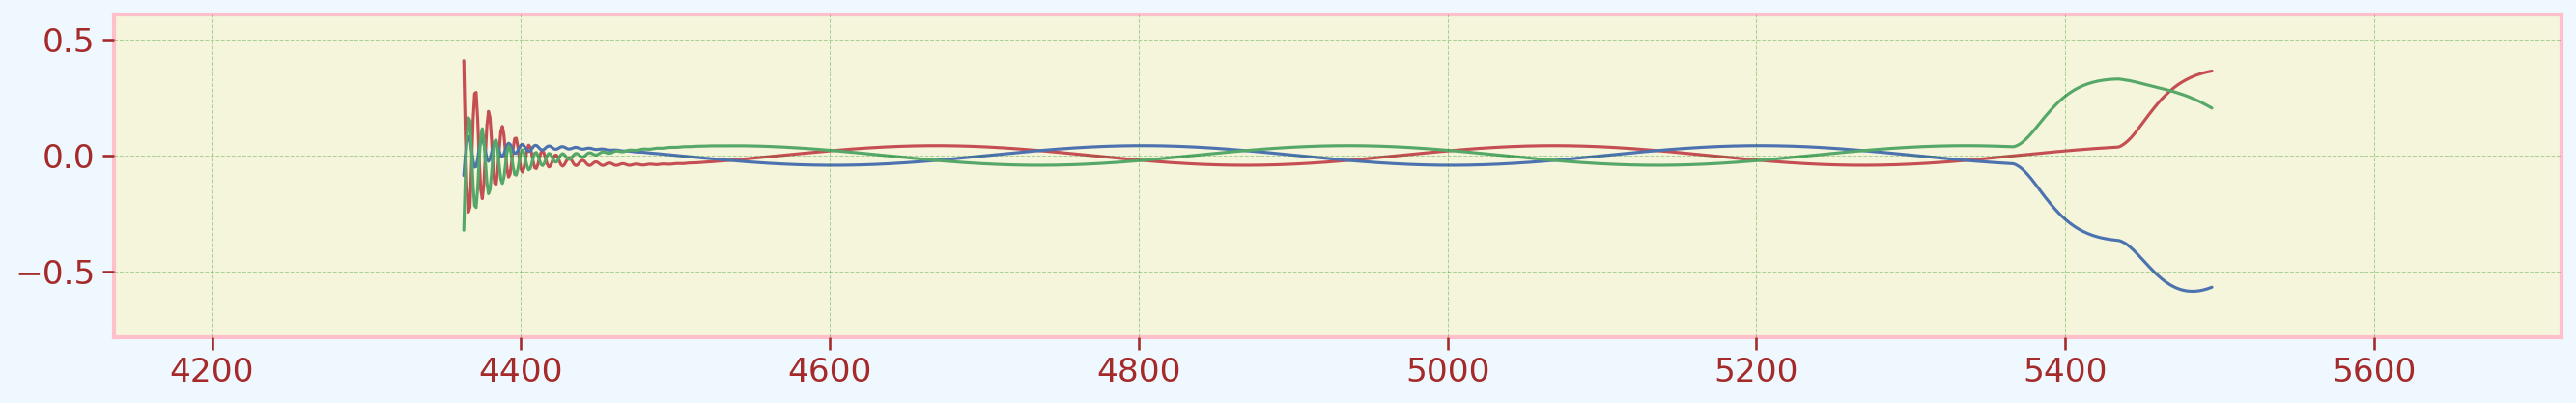

In [315]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABCG_Fault["Va"],'r')
ax = plt.plot(Line_ABCG_Fault["Vb"],'b')
ax = plt.plot(Line_ABCG_Fault["Vc"],'g');

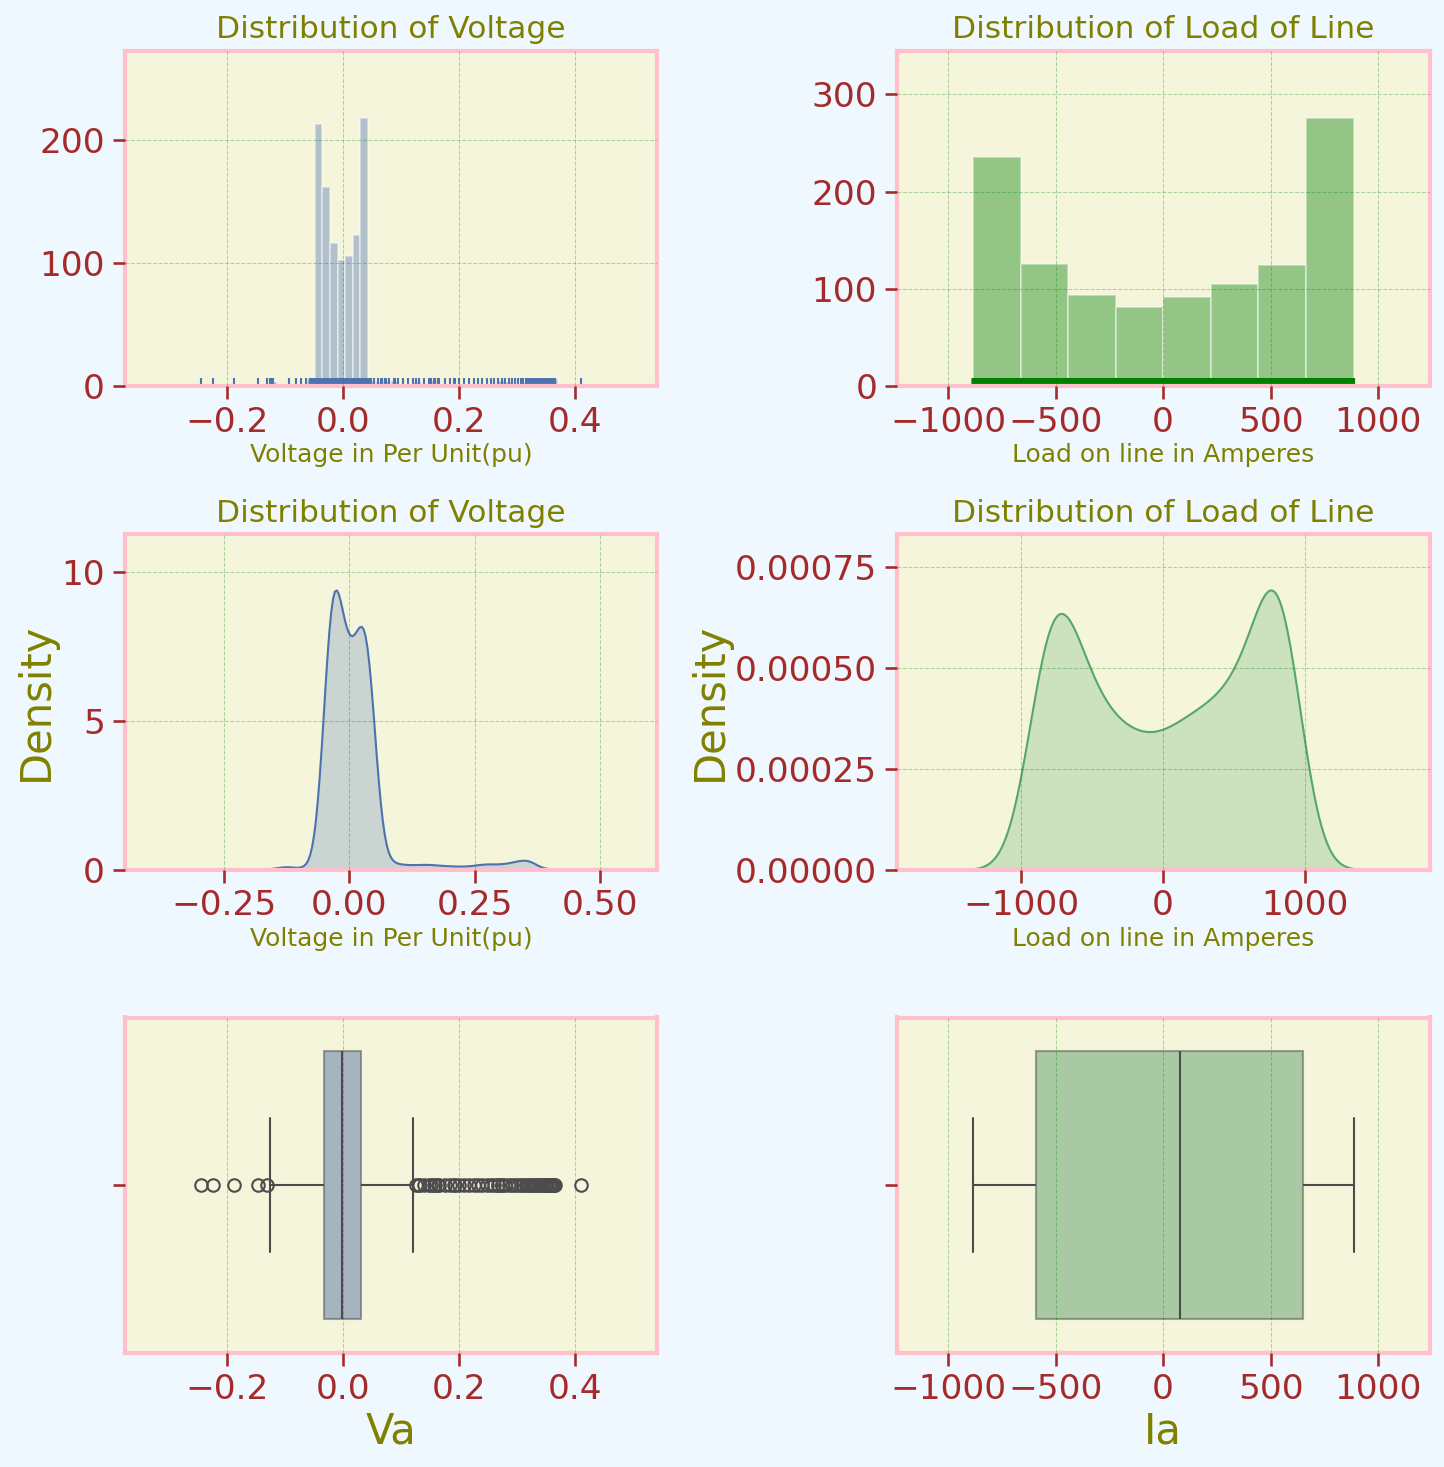

In [316]:
plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(Line_ABCG_Fault['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(Line_ABCG_Fault['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(Line_ABCG_Fault['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(Line_ABCG_Fault['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = Line_ABCG_Fault['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = Line_ABCG_Fault['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()


<h1 style="background-color:black
;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 150px 150px; color:#40E0D0">Feature and Label seperation </h1><a id=0></a>

<span style="background-color:pink;
             color:Blue;
             font-size:25px;
             text-align:center;
             border-radius:50px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;"> Categorical to Numerical conversion
</span>

In [317]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_class['Fault_Type'] = encoder.fit_transform(df_class['Fault_Type'])
df_class.head()

G  C  B  A      Ia      Ib      Ic    Va    Vb    Vc  Fault_Type
0  1  0  0  1 -151.29   -9.68   85.80  0.40 -0.13 -0.27           3
1  1  0  0  1 -336.19  -76.28   18.33  0.31 -0.12 -0.19           3
2  1  0  0  1 -502.89 -174.65  -80.92  0.27 -0.11 -0.15           3
3  1  0  0  1 -593.94 -217.70 -124.89  0.24 -0.10 -0.13           3
4  1  0  0  1 -643.66 -224.16 -132.28  0.21 -0.10 -0.11           3

<span style="background-color:pink;
             color:Blue;
             font-size:25px;
             text-align:center;
             border-radius:50px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;"> Dependent and Independent Variable Sepration
</span>

In [318]:
X = df_class.drop(['Fault_Type'],axis=1)
y = df_class['Fault_Type']

<span style="background-color:pink;
             color:Blue;
             font-size:25px;
             text-align:center;
             border-radius:50px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;"> Train Test Split
</span>

In [319]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

<h1 style="background-color:black
;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 150px 150px; color:#40E0D0"> Model Selection </h1><a id=0></a>

<div style="display:fill;
            border-radius:15px;
            background-color:cyan;
            font-size:210%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:Brown;
            border-style: solid;
            border-color: red;
            text-align:Left;">
<b>Logistic Regression</b>
</div>

Training Accuracy    : 90.31 %
Model Accuracy Score : 89.64 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.57      1.00      0.72       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      0.18      0.30       198
           5       1.00      1.00      1.00       456

    accuracy                           0.90      1573
   macro avg       0.93      0.86      0.84      1573
weighted avg       0.94      0.90      0.87      1573

--------------------------------------------------------


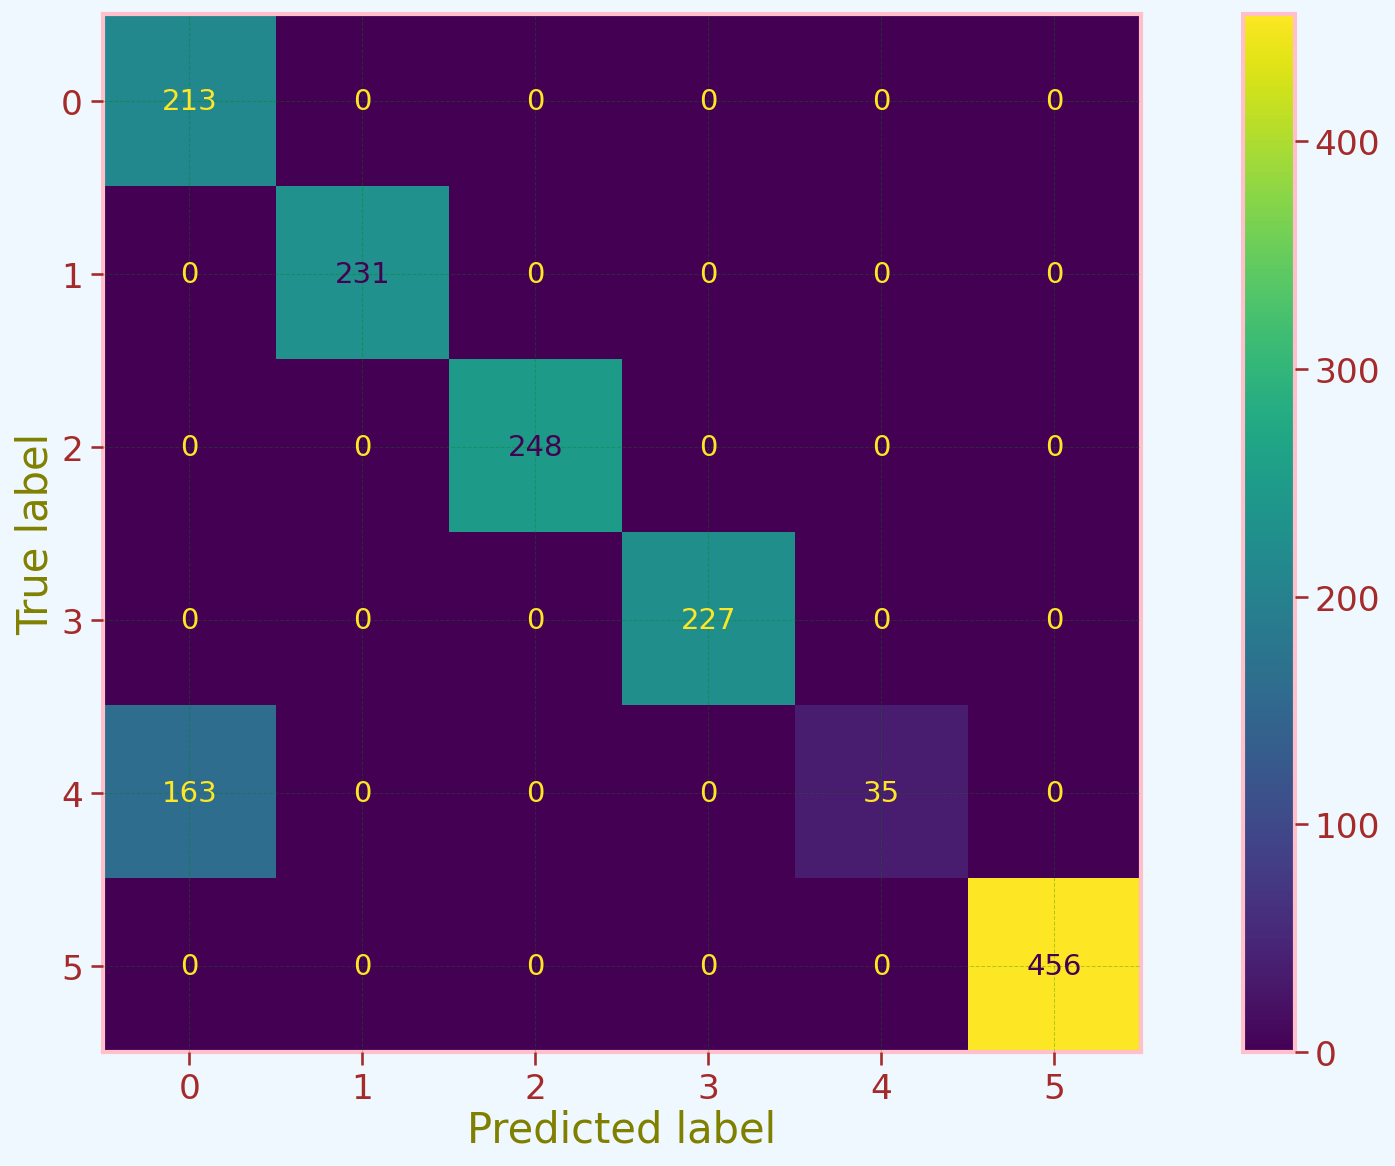

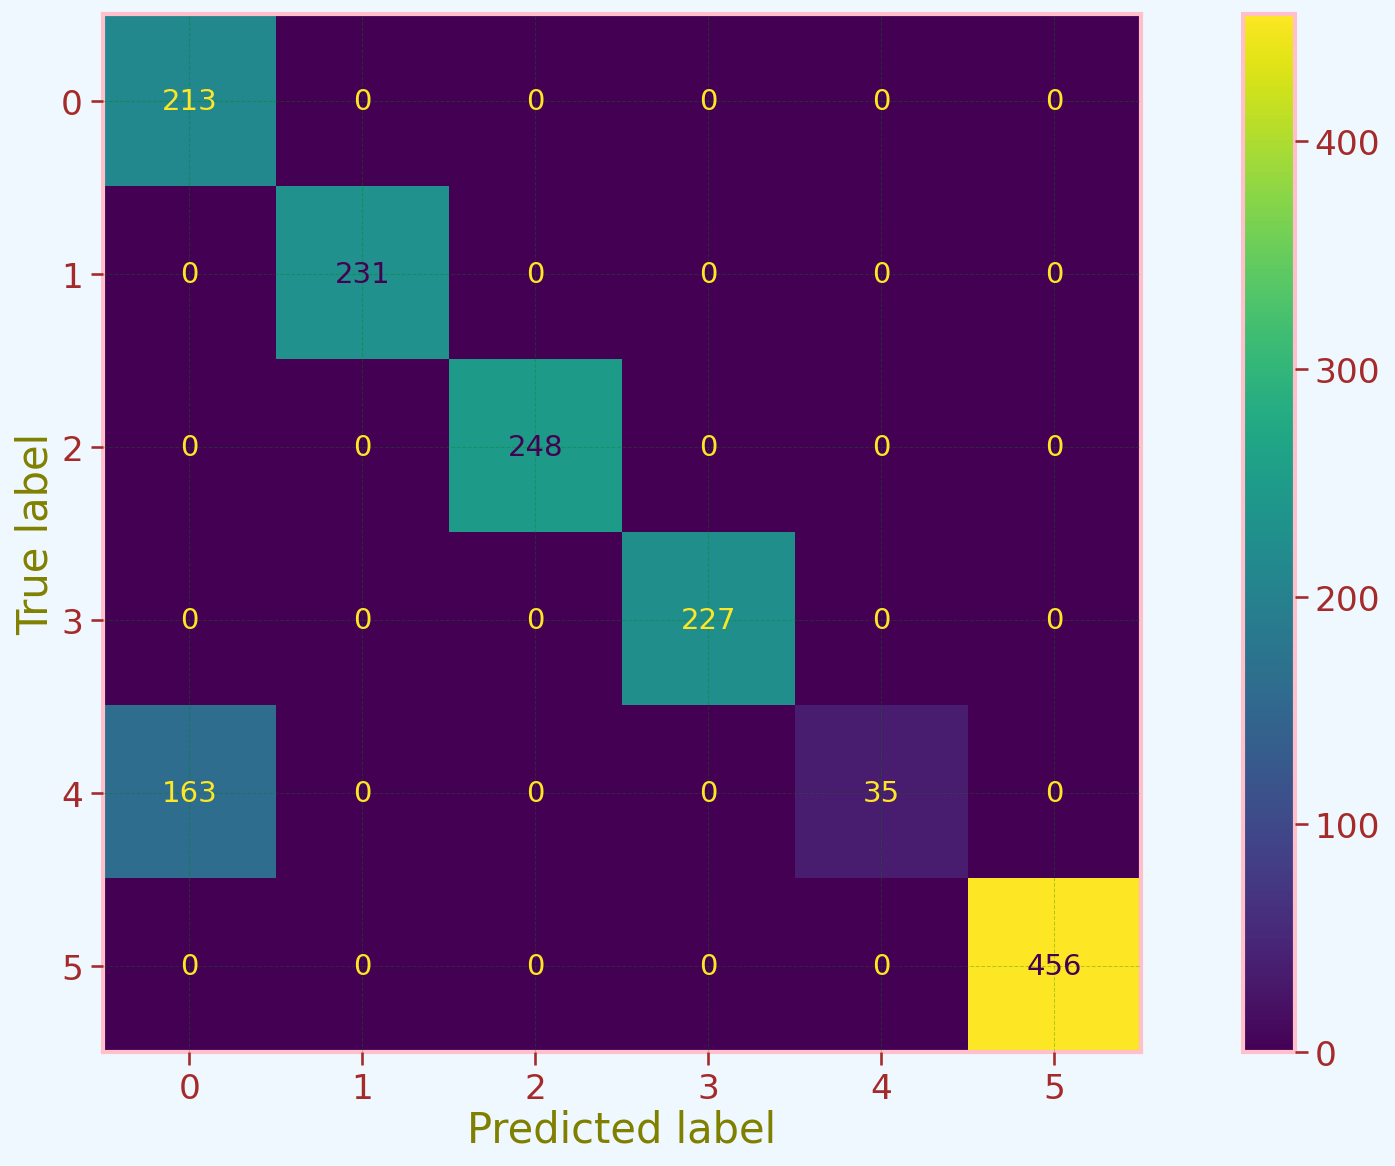

In [320]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
disp = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
disp.plot(); # display the confusion matrix


<div style="display:fill;
            border-radius:15px;
            background-color:cyan;
            font-size:210%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:Brown;
            border-style: solid;
            border-color: red;
            text-align:Left;">
<b>Decision Tree Classifier</b>
</div>

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


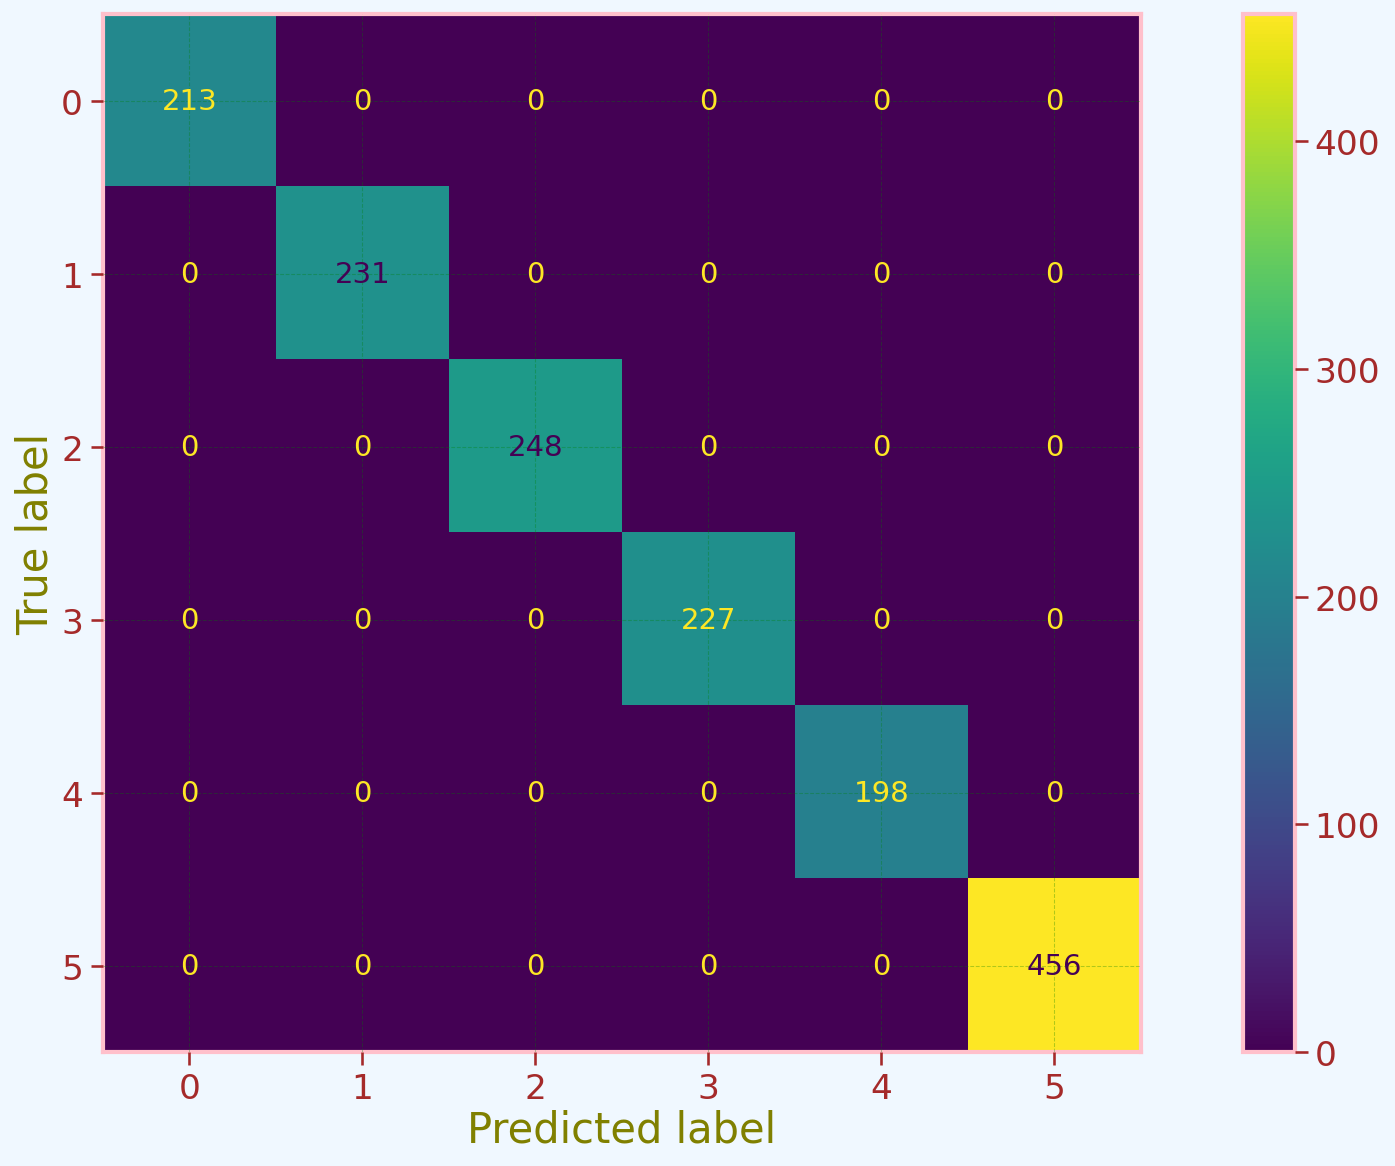

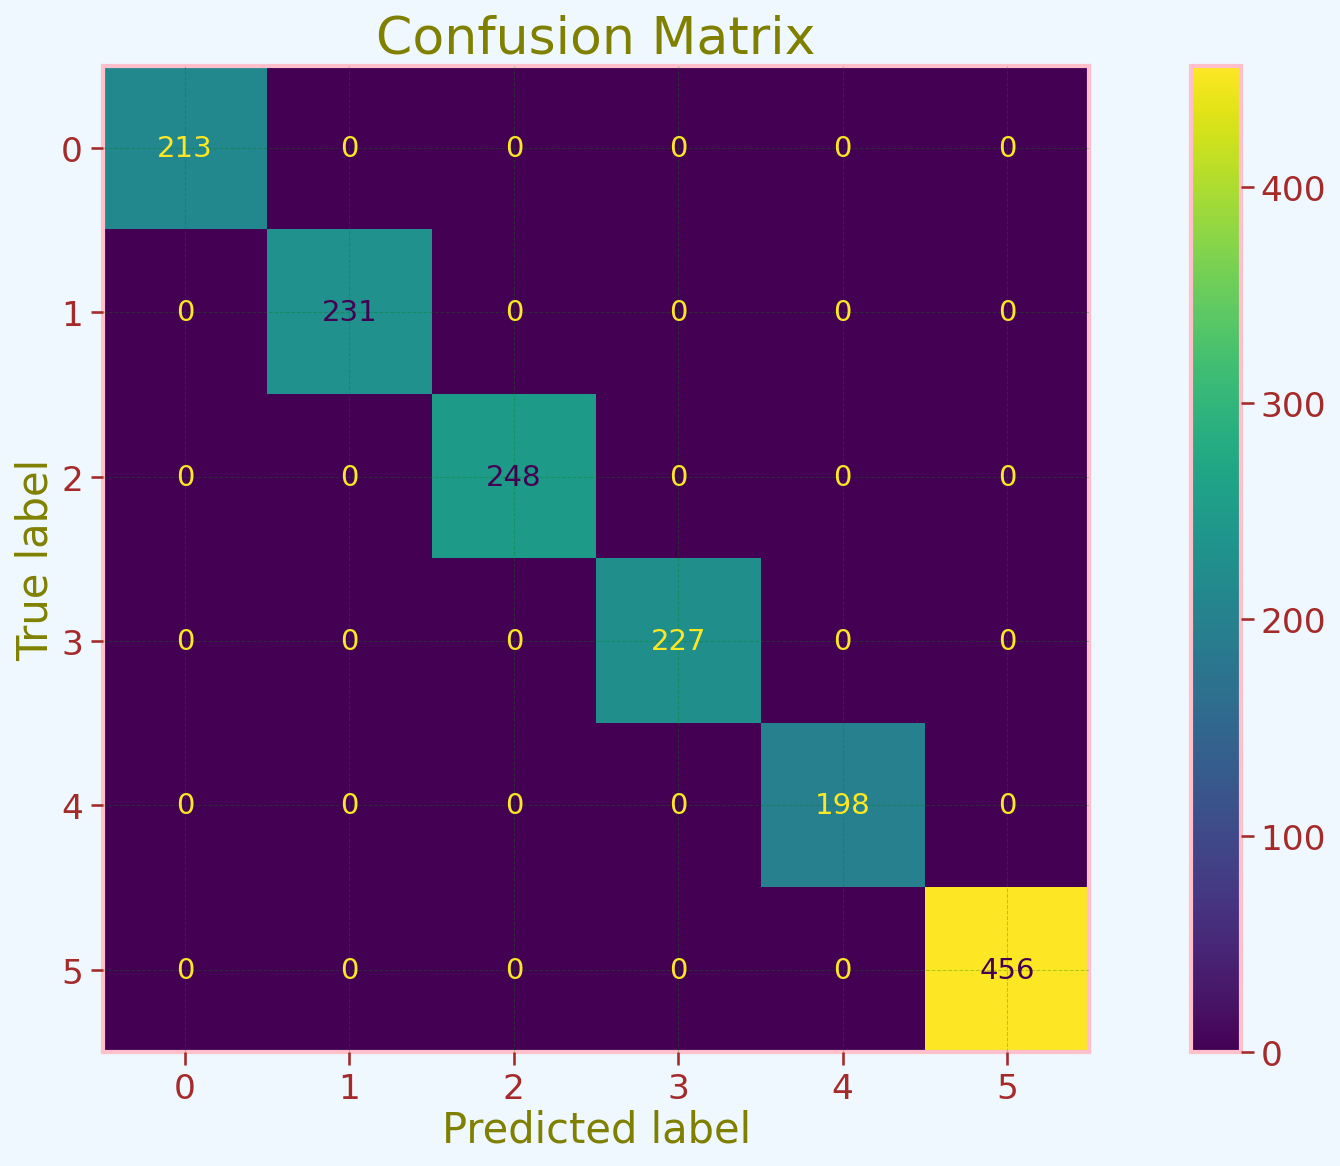

In [321]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import pyplot

decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
# Instead of plot_confusion_matrix, use ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(decision, X_test, y_test)
disp.plot()
plt.title('Confusion Matrix'); # Add title to the plot

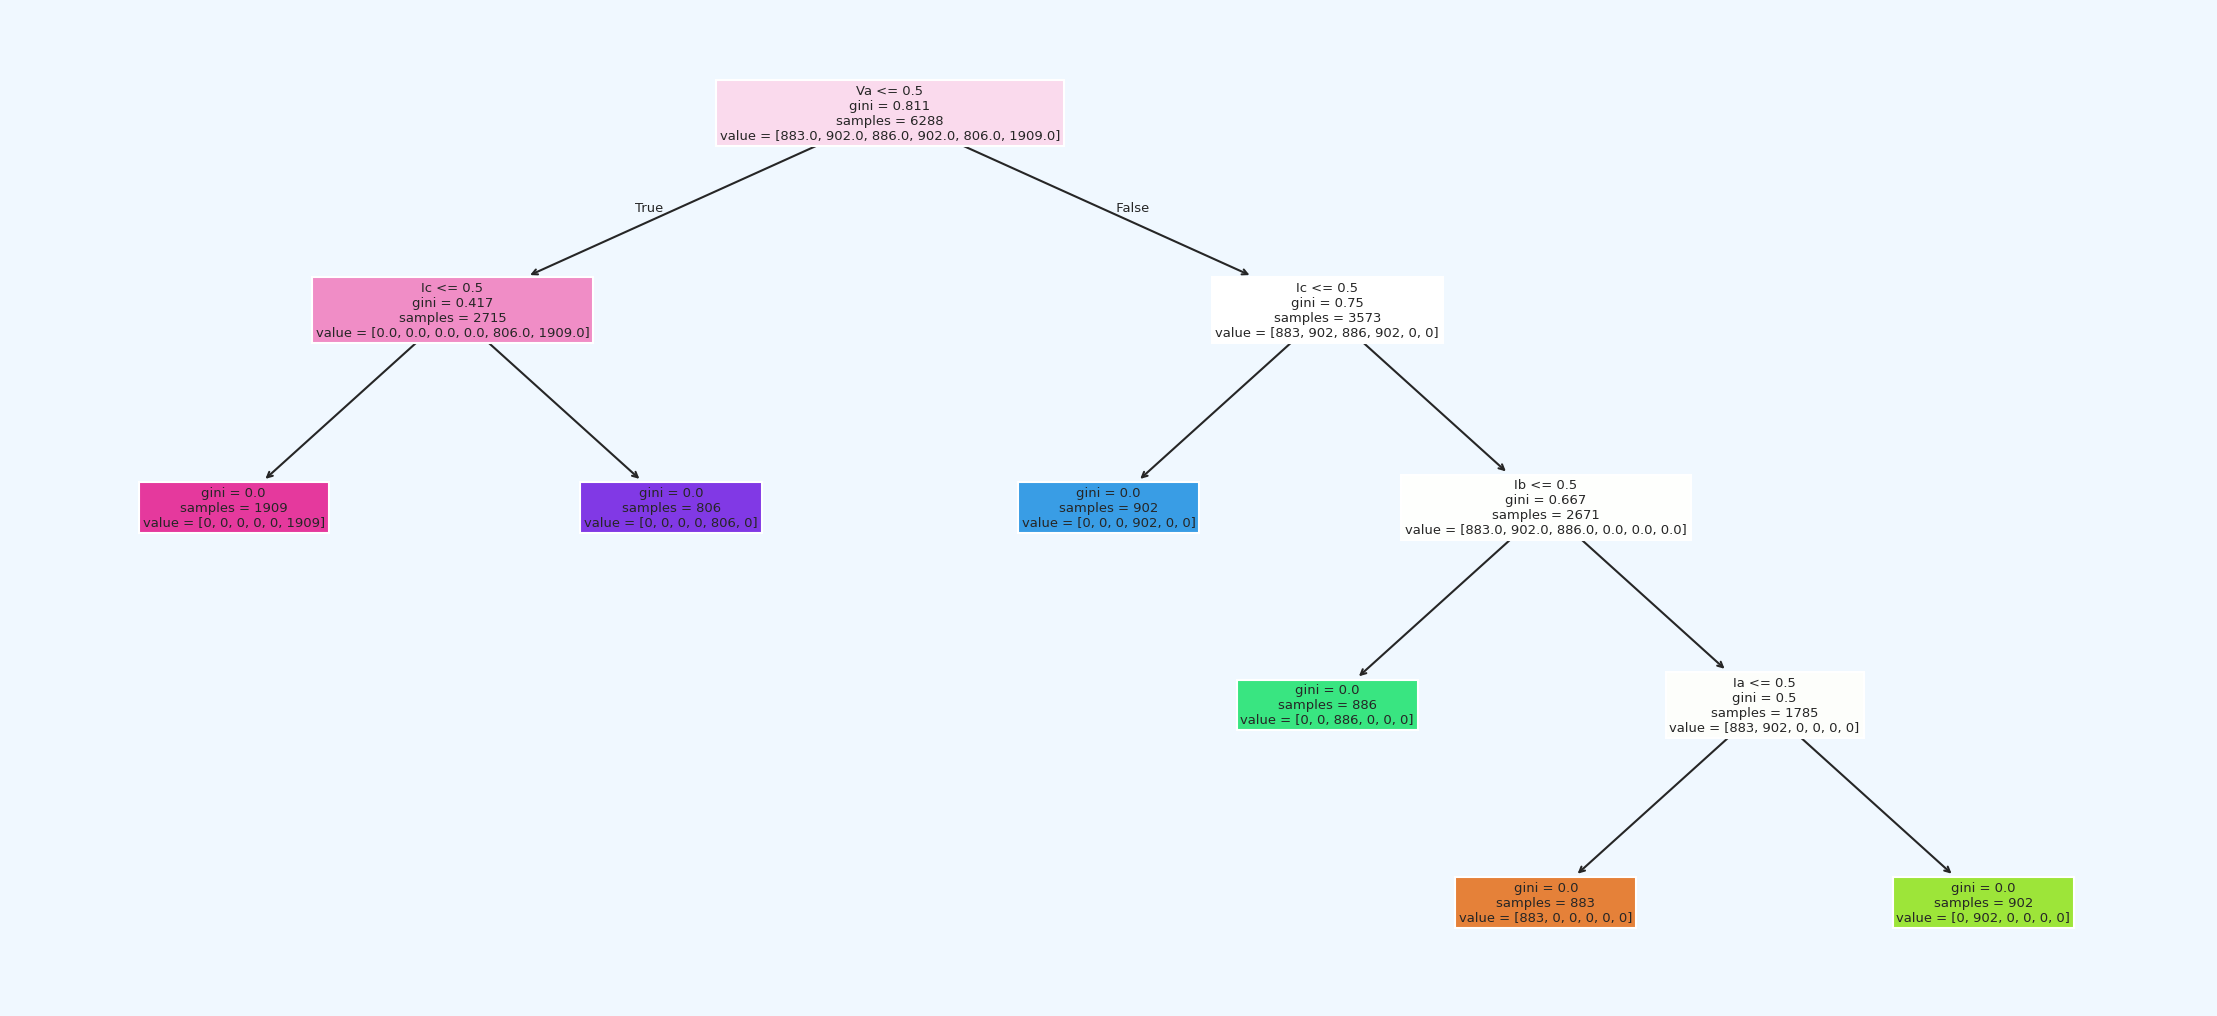

In [322]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(decision,filled=True,feature_names=['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])
plt.show()

In [323]:
from sklearn import tree
def tree_plot(model_name):
    plt.figure(figsize=(20,20))
    features = df_class.columns
    classes = ['NO Fault','Line A to Ground Fault','Line B to Line C Fault','Line A Line B to Ground Fault','Line A Line B Line C','Line A Line B Line C to Ground Fault']
    tree.plot_tree(model_name,feature_names=features,class_names=classes,filled=True)
    plt.show()

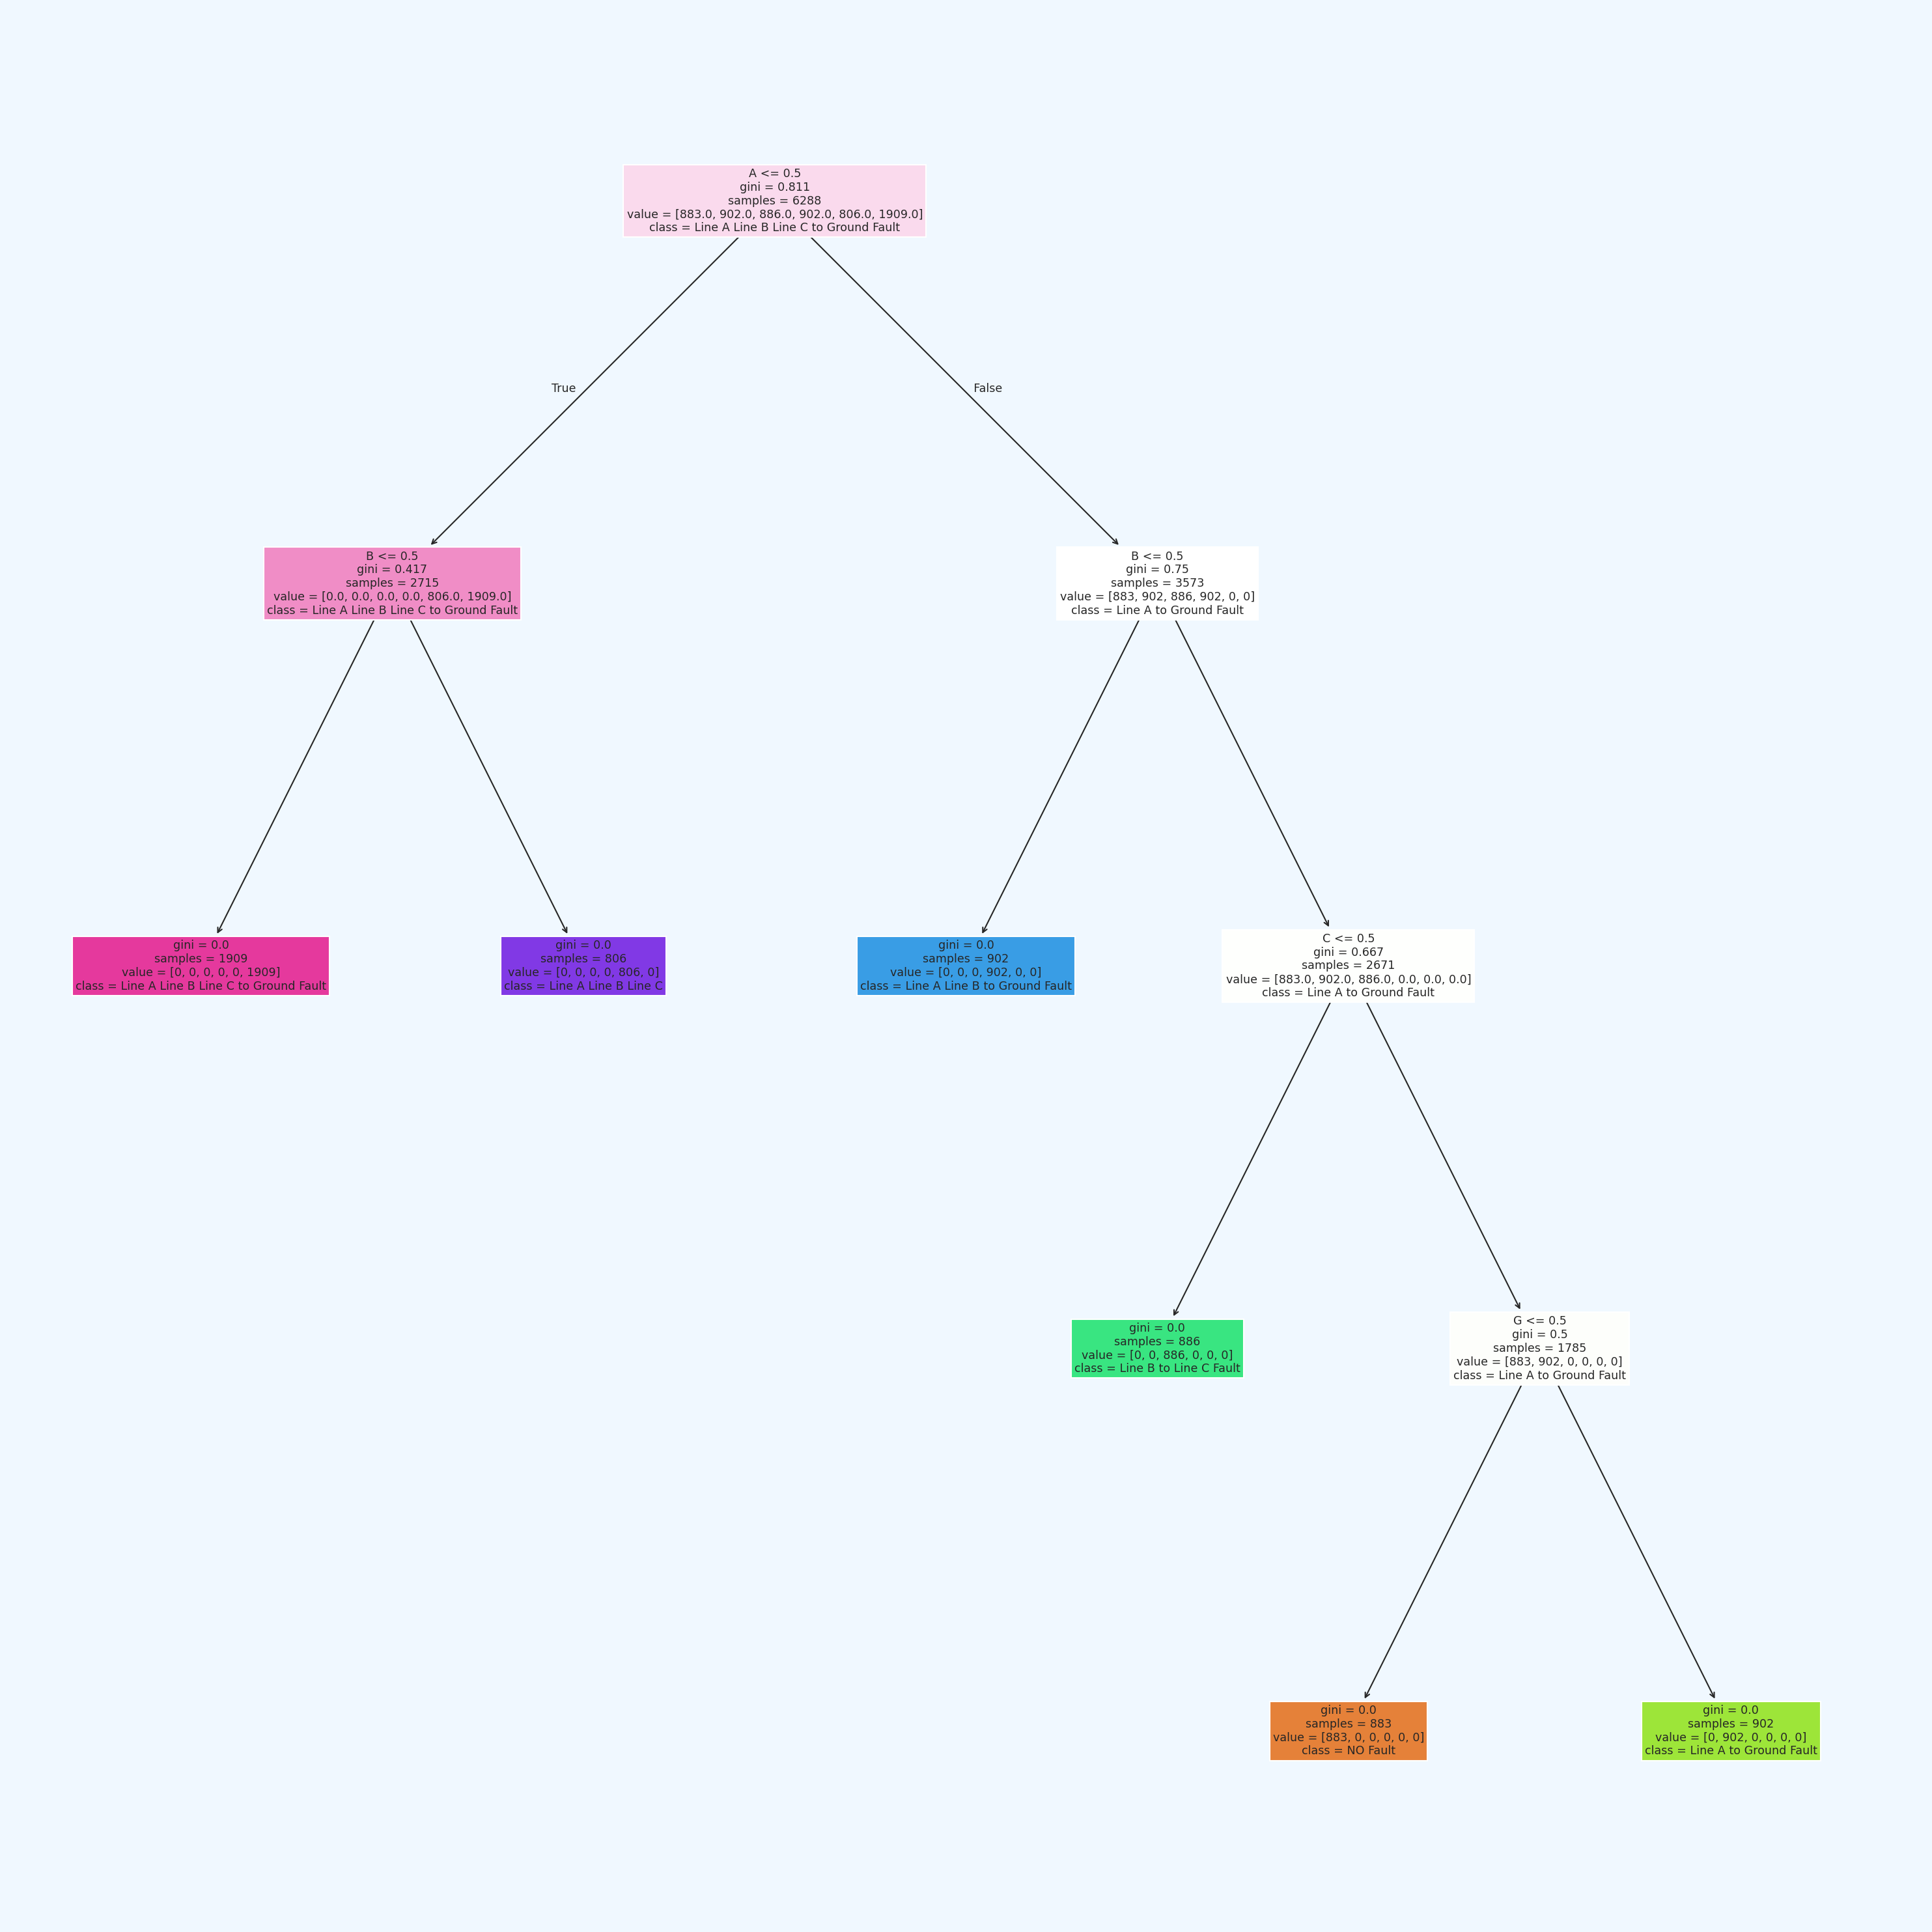

In [324]:
tree_plot(decision)

<div style="display:fill;
            border-radius:15px;
            background-color:cyan;
            font-size:210%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:Brown;
            border-style: solid;
            border-color: red;
            text-align:Left;">
<b>Random Forest Classifier</b>
</div>

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


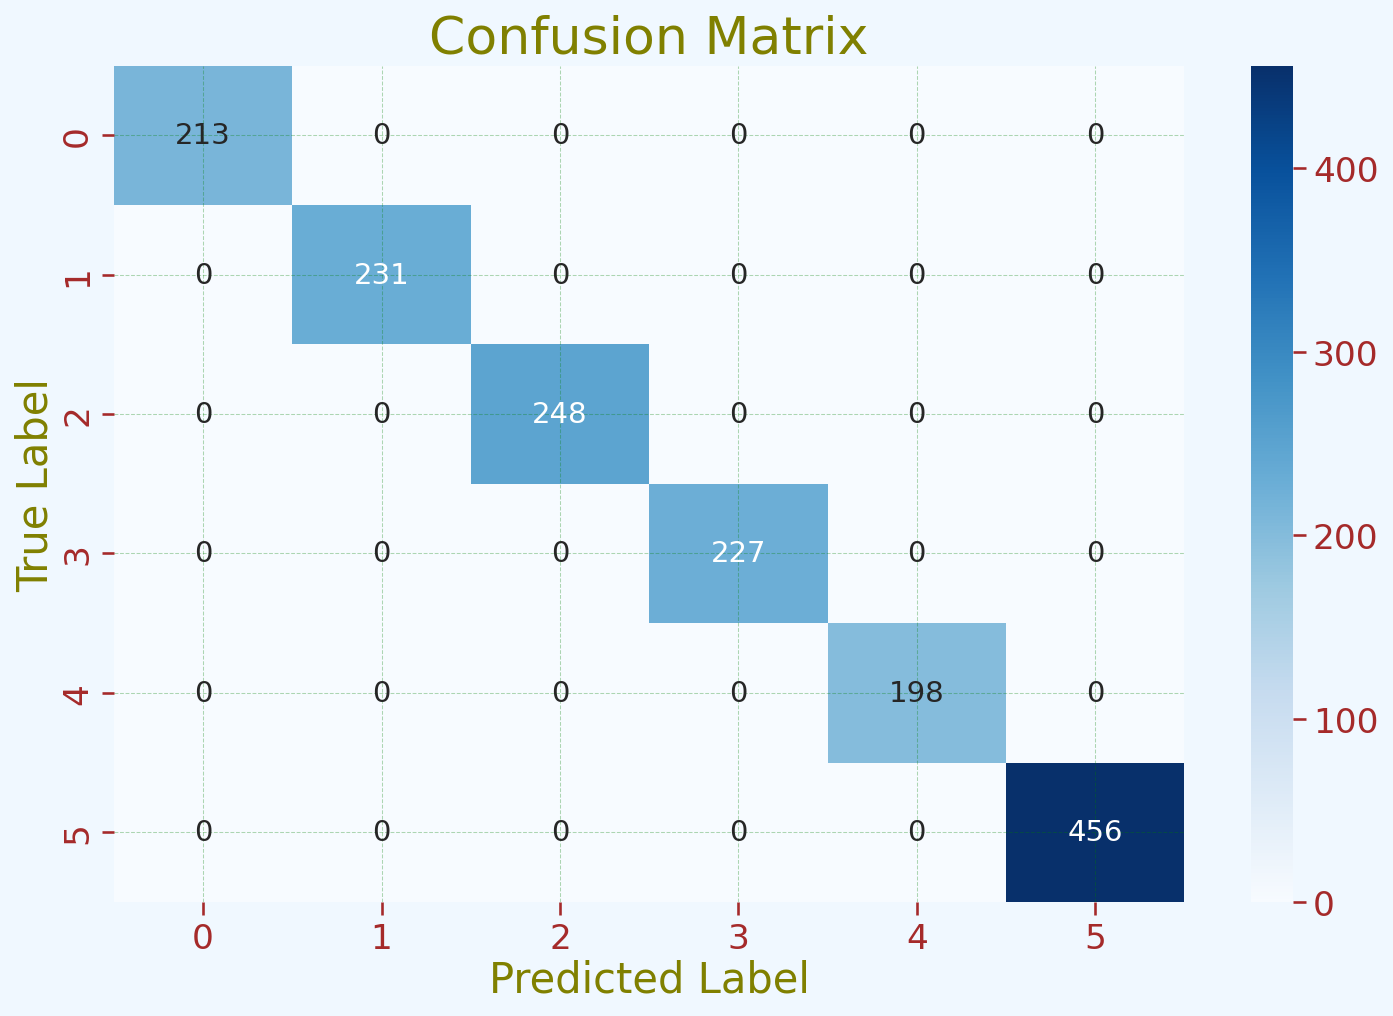

In [325]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Import the confusion_matrix function and matplotlib
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)
cm = confusion_matrix(y_test, y_pred_rf)
print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<div style="display:fill;
            border-radius:15px;
            background-color:cyan;
            font-size:210%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:Brown;
            border-style: solid;
            border-color: red;
            text-align:Left;">
<b>XGB Classifier</b>
</div>

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


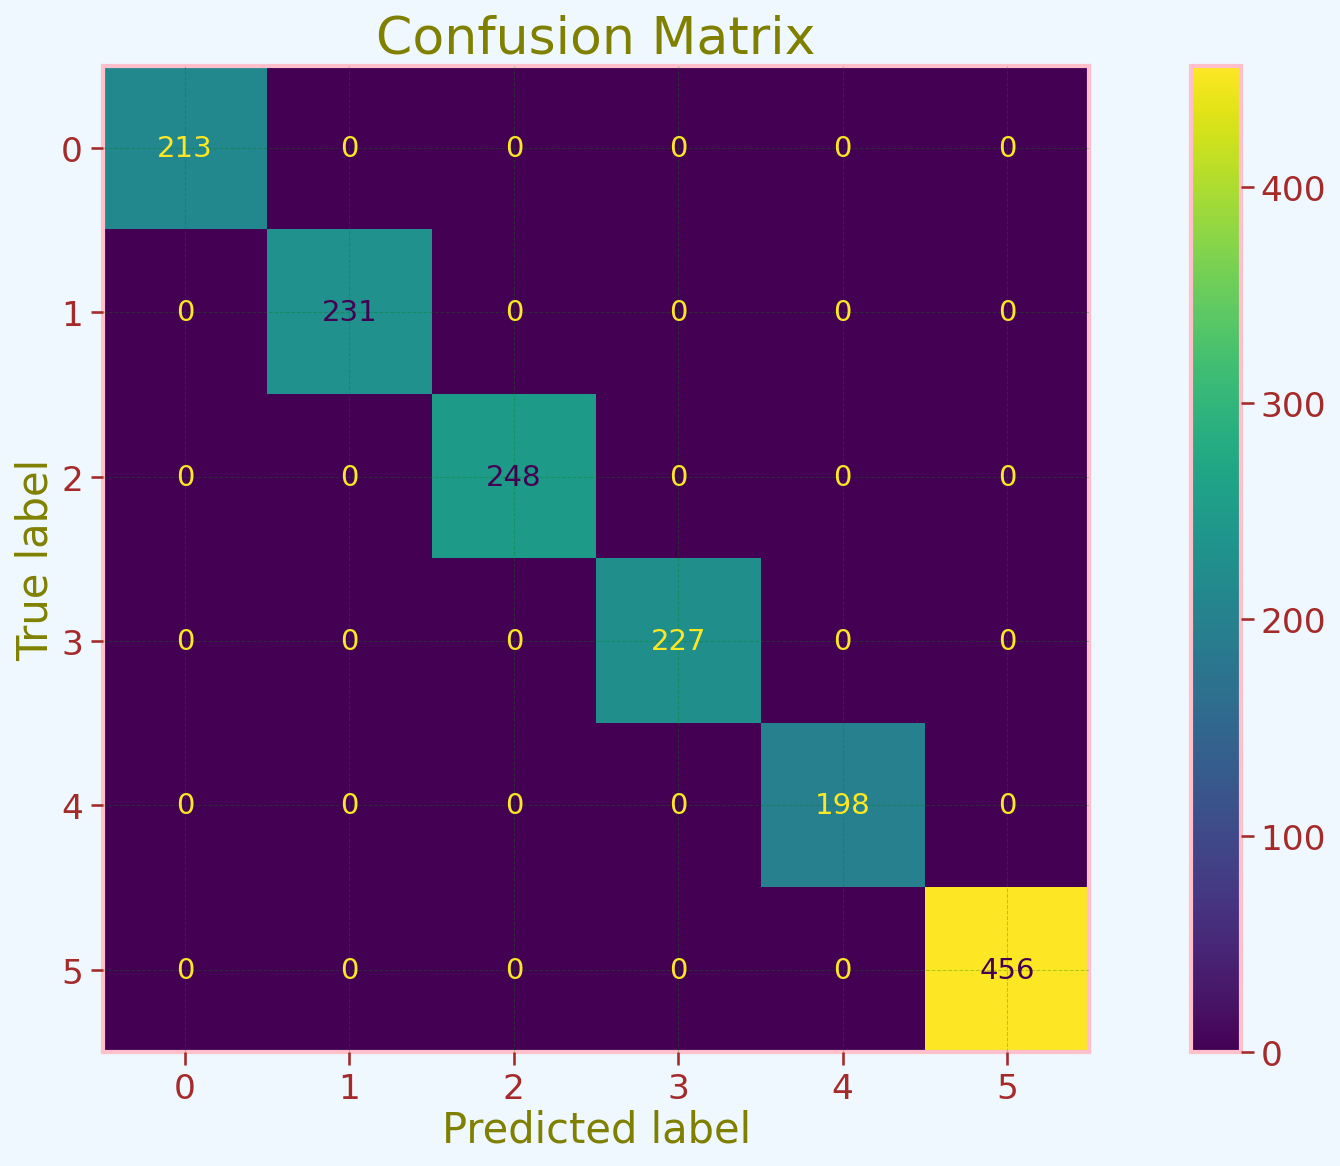

In [326]:
import xgboost as Xgb
# Import ConfusionMatrixDisplay instead of plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
# Use ConfusionMatrixDisplay to plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.title('Confusion Matrix');

<div style="display:fill;
            border-radius:15px;
            background-color:cyan;
            font-size:210%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:Brown;
            border-style: solid;
            border-color: red;
            text-align:Left;">
<b>Support Vector Machines</b>
</div>

Training Accuracy    : 76.51 %
Model Accuracy Score : 74.19 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.48      0.35      0.40       213
           1       0.43      0.29      0.35       231
           2       0.75      0.83      0.78       248
           3       0.77      0.86      0.81       227
           4       0.79      0.86      0.82       198
           5       0.87      1.00      0.93       456

    accuracy                           0.74      1573
   macro avg       0.68      0.70      0.68      1573
weighted avg       0.71      0.74      0.72      1573

--------------------------------------------------------


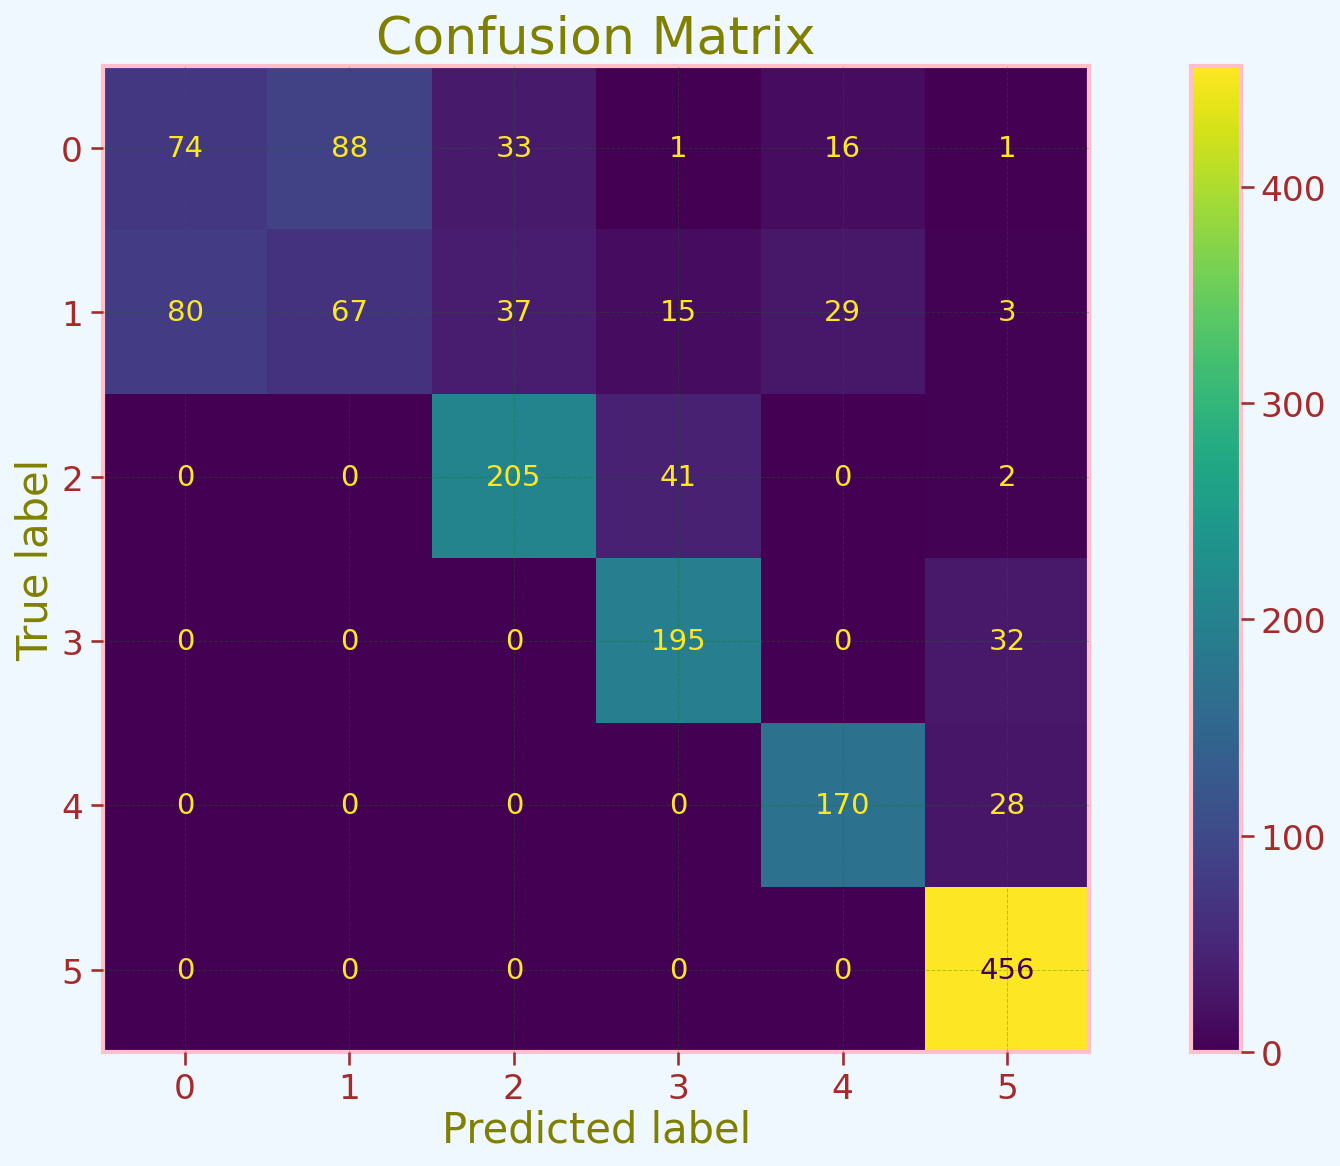

In [327]:
# Support Vector Machines
from sklearn.svm import SVC
# Import ConfusionMatrixDisplay instead of plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)
# Use ConfusionMatrixDisplay to plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Confusion Matrix');

<h1 style="background-color:black
;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 150px 150px; color:#40E0D0"> Comparing Different Models </h1><a id=0></a>

In [328]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree', 'XGBClassifier'
    ],

    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train, xgb_train],

    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy,
        xgb_accuracy
    ]
})

In [329]:
# Instead of using 'precision', try using 'display.precision'
pd.set_option('display.precision', 2)

# Chain the styling methods differently to avoid the error
styled_models = models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(cmap='coolwarm')
styled_models.set_properties(**{'font-family': 'Lucida Calligraphy', 'color': 'LigntGreen', 'font-size': '15px'})
# Hide the index after setting properties
styled_models.hide(axis='index') # Use hide() with axis='index' to hide the index

# Display the styled DataFrame
styled_models

<h1 style="background-color:black
;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 150px 150px; color:#40E0D0"> Result Prediction</h1><a id=0></a>

<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">1. Random Forest Classifier
</span>

In [330]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

[1 0 0 ... 0 0 5]


In [331]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">2. Decision Tree Classifier
</span>

In [332]:
prediction2 = decision.predict(X_test)
print(prediction2)

[1 0 0 ... 0 0 5]


In [333]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction2})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">3. XGB Classifier
</span>

In [334]:
prediction3 = xgb.predict(X_test)
print(prediction3)

[1 0 0 ... 0 0 5]


In [335]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction3})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">4. Support Vector Machines
</span>

In [336]:
prediction4 = svc.predict(X_test)
print(prediction4)

[0 2 1 ... 0 2 5]


In [337]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction4})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">5. Logistic Regression
</span>

In [338]:
prediction5 = logreg.predict(X_test)
print(prediction5)

[1 0 0 ... 0 0 5]


In [339]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction5})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:yellow;
       font-size:120%;
       font-family:Nexa;
       style:justify;
       font-family:'Times New Roman';
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:Black;">
         Random Forest,Decision Tree Classifier,XGB Classifier,	are giving the best Result with 100 percent accuracy and  is doing  a great job till now in Fault Detection, than the rest of the models because it's able to predict all the signals in most efficient manner while in other models there are cases where there is actually fault but the model is not able to identify it.Logistic Regression is giving the worst accuracy
    </p>
</div>